In [14]:
import os, subprocess
import json
import uproot3
import awkward as ak
import numpy as np
from coffea import processor, util, hist
import pickle

from plotter import *

In [15]:
lumis = {}
lumis['2016'] = 35.9
lumis['2017'] = 41.5
lumis['2018'] = 59.9

with open('xsec.json') as f:
  xs = json.load(f)

with open('pmap.json') as f:
  pmap = json.load(f)

systematics = ['nominal',
               'jet_triggerUp','jet_triggerDown',
               'btagWeightUp','btagWeightDown','btagEffStatUp','btagEffStatDown',
               'UESUp','UESDown','JESUp','JESDown','JERUp','JERDown',
              ]

In [16]:
year = '2017'
nfiles = len(subprocess.getoutput("ls infiles-split/"+year+"*.json").split())
outsum = processor.dict_accumulator()

In [26]:
# Read the histogram from the pickle file
templates = pickle.load(open('pickles/templates.pkl','rb'))

In [27]:
# check intergrals
templates.sum('pt1','msd1','ddb1','msd2').integrate('region','signal').integrate('systematic', 'nominal').values()

{('ZH',): array(6.87884939),
 ('WH',): array(7.90901219),
 ('ttH',): array(3.06014383),
 ('VBF',): array(2.95224634),
 ('ggF',): array(7.7316984),
 ('ggF-powheg',): array(15.19976363),
 ('QCD',): array(230514.07351629),
 ('VV',): array(283.54594198),
 ('Wjets',): array(7242.96986068),
 ('Zjets',): array(3624.96007327),
 ('ttbar',): array(3038.86390541),
 ('singlet',): array(527.87535061),
 ('data',): array(215800.),
 ('muondata',): array(5137.)}

In [29]:
h = templates.sum('pt1','msd2','ddb1').integrate('region', 'signal')
mc = ['QCD','Wjets','Zjets','ttbar','singlet','VV','ggF','VBF','ZH','WH']

/srv/vh-charm-category/plotter.py:96: RuntimeWarning: invalid value encountered in double_scalars
  up_ratio = np.array([up_array[i]/nom_array[i] for i in range(len(nom_array))])
/srv/vh-charm-category/plotter.py:97: RuntimeWarning: invalid value encountered in double_scalars
  do_ratio = np.array([do_array[i]/nom_array[i] for i in range(len(nom_array))])
/srv/vh-charm-category/plotter.py:96: RuntimeWarning: invalid value encountered in double_scalars
  up_ratio = np.array([up_array[i]/nom_array[i] for i in range(len(nom_array))])
/srv/vh-charm-category/plotter.py:97: RuntimeWarning: invalid value encountered in double_scalars
  do_ratio = np.array([do_array[i]/nom_array[i] for i in range(len(nom_array))])
/srv/vh-charm-category/plotter.py:96: RuntimeWarning: invalid value encountered in double_scalars
  up_ratio = np.array([up_array[i]/nom_array[i] for i in range(len(nom_array))])
/srv/vh-charm-category/plotter.py:97: RuntimeWarning: invalid value encountered in double_scalars
  do_ra

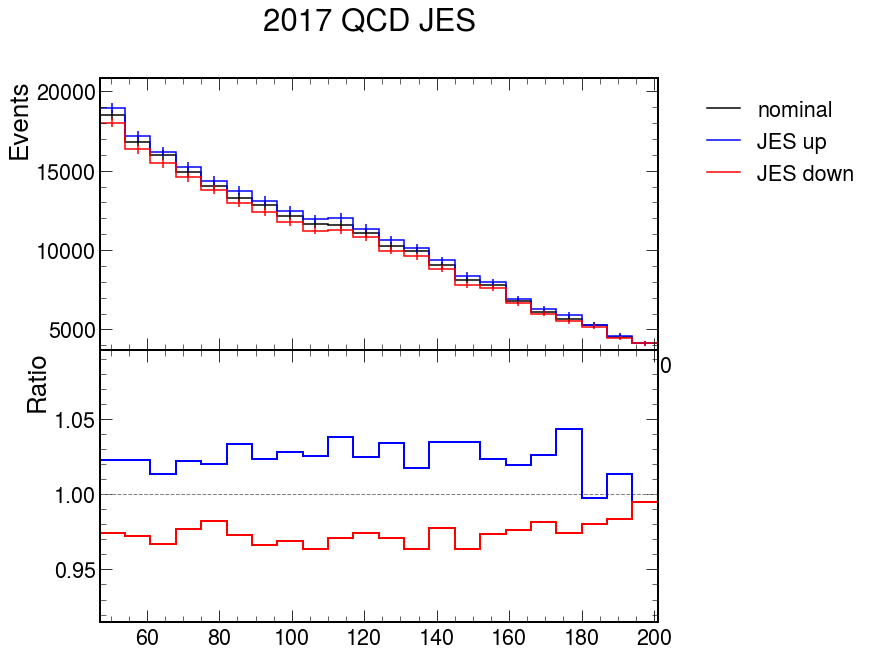

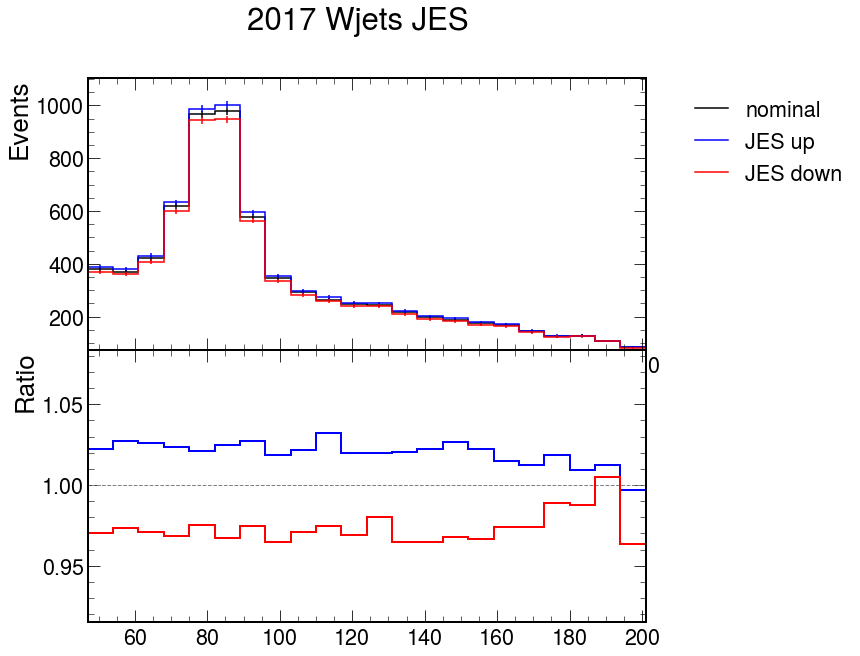

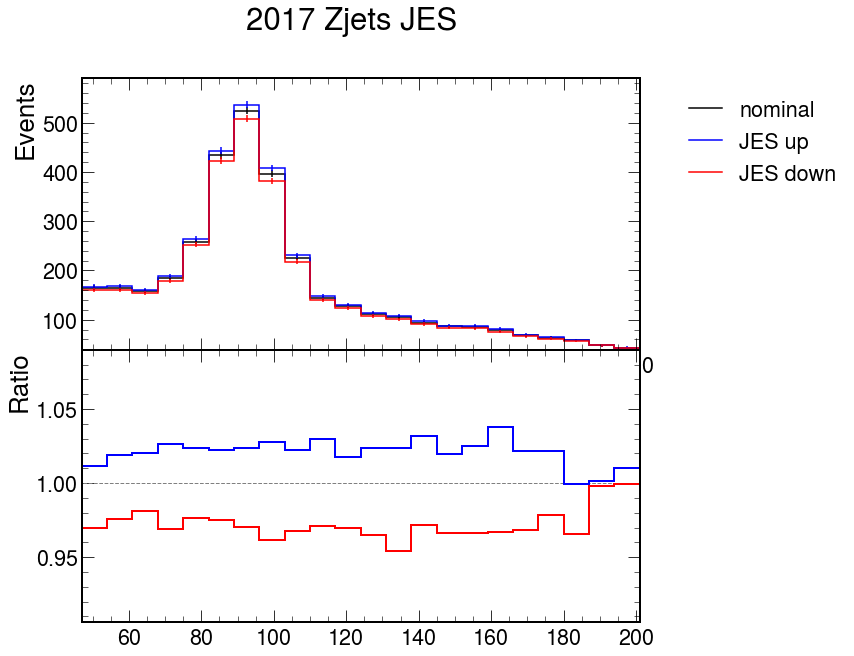

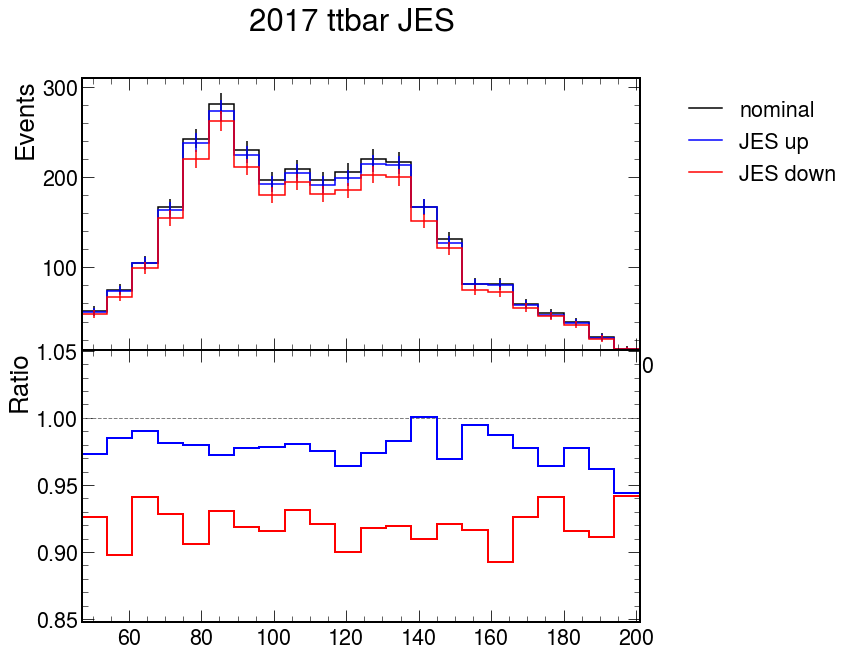

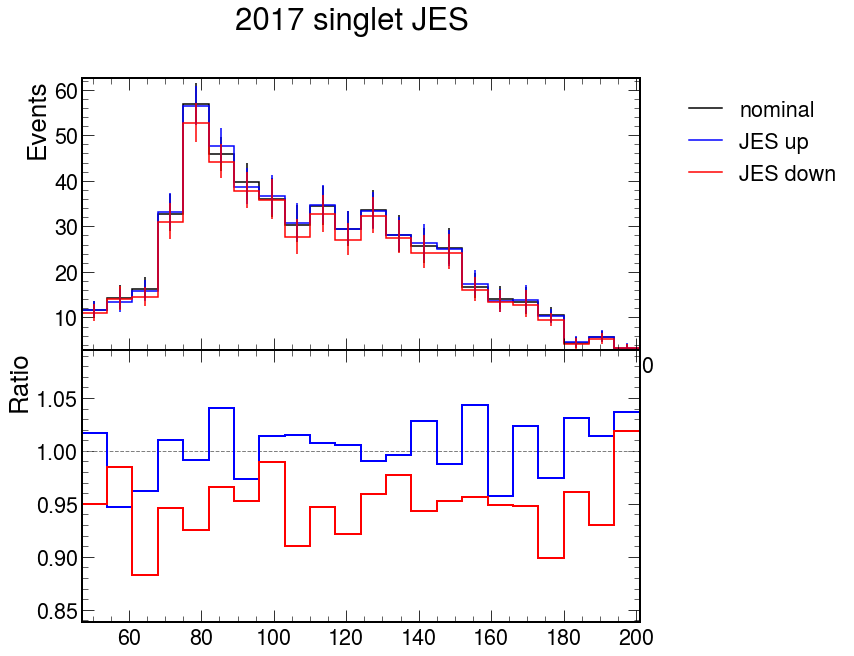

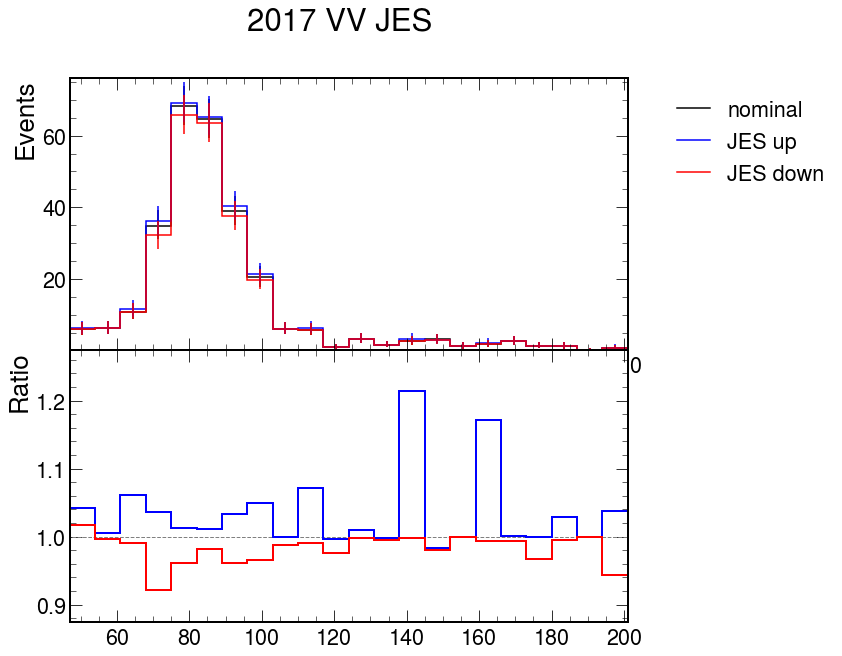

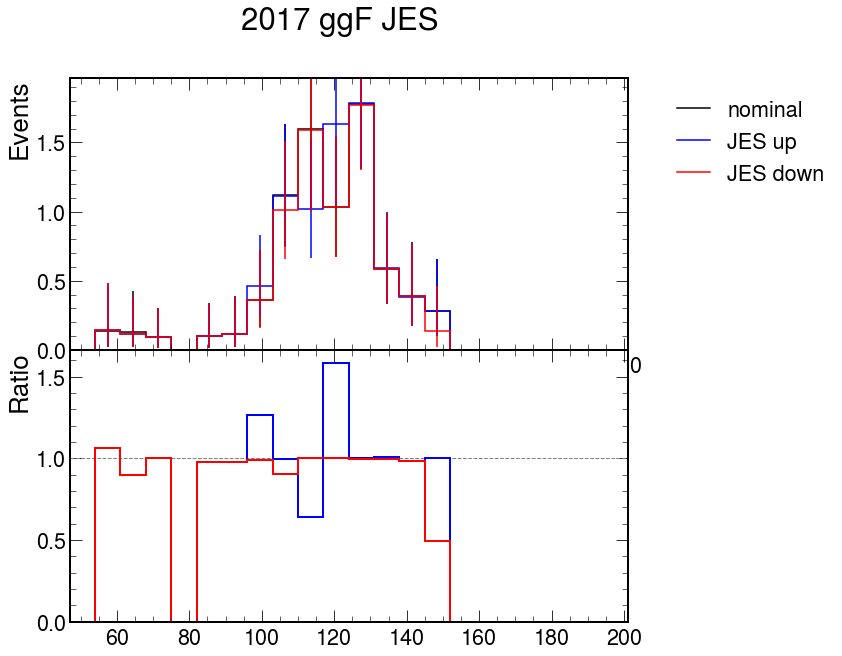

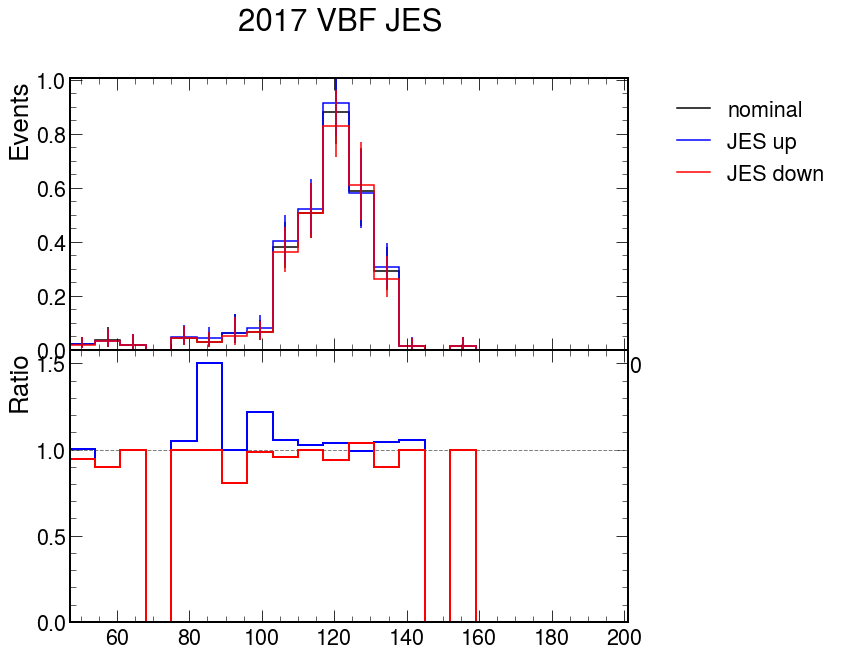

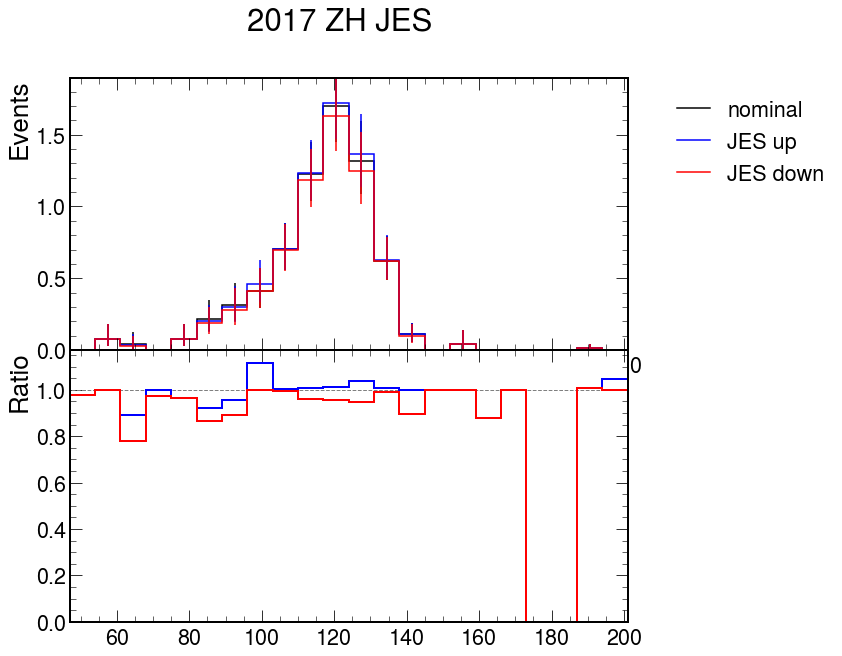

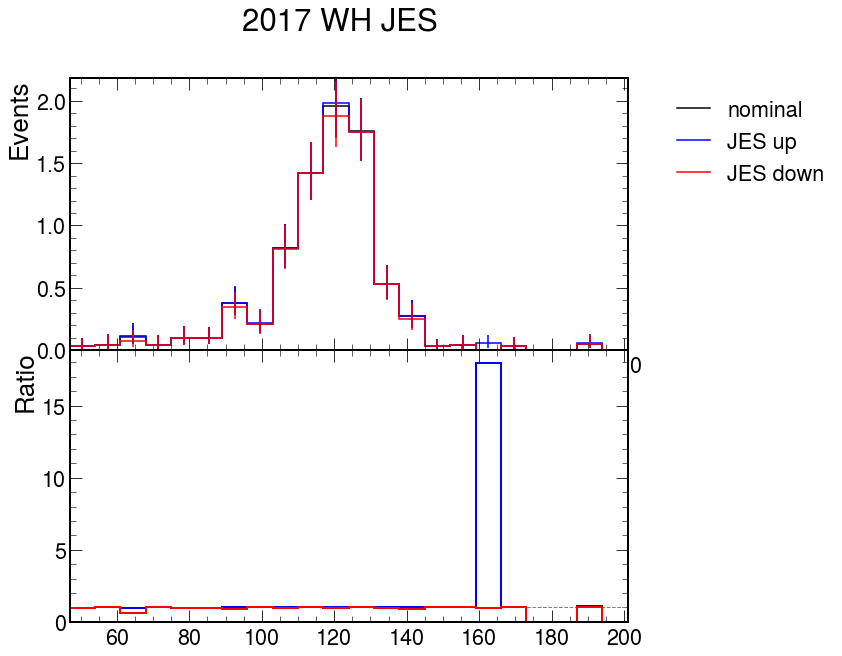

In [31]:
for p in mc:
    plot_syst(h.integrate('process',p),'JES', year+' '+p+' JES', year+'/syst_JES/'+p)

/srv/vh-charm-category/plotter.py:96: RuntimeWarning: invalid value encountered in double_scalars
  up_ratio = np.array([up_array[i]/nom_array[i] for i in range(len(nom_array))])
/srv/vh-charm-category/plotter.py:97: RuntimeWarning: invalid value encountered in double_scalars
  do_ratio = np.array([do_array[i]/nom_array[i] for i in range(len(nom_array))])
/srv/vh-charm-category/plotter.py:96: RuntimeWarning: invalid value encountered in double_scalars
  up_ratio = np.array([up_array[i]/nom_array[i] for i in range(len(nom_array))])
/srv/vh-charm-category/plotter.py:97: RuntimeWarning: invalid value encountered in double_scalars
  do_ratio = np.array([do_array[i]/nom_array[i] for i in range(len(nom_array))])
/srv/vh-charm-category/plotter.py:96: RuntimeWarning: invalid value encountered in double_scalars
  up_ratio = np.array([up_array[i]/nom_array[i] for i in range(len(nom_array))])
/srv/vh-charm-category/plotter.py:97: RuntimeWarning: invalid value encountered in double_scalars
  do_ra

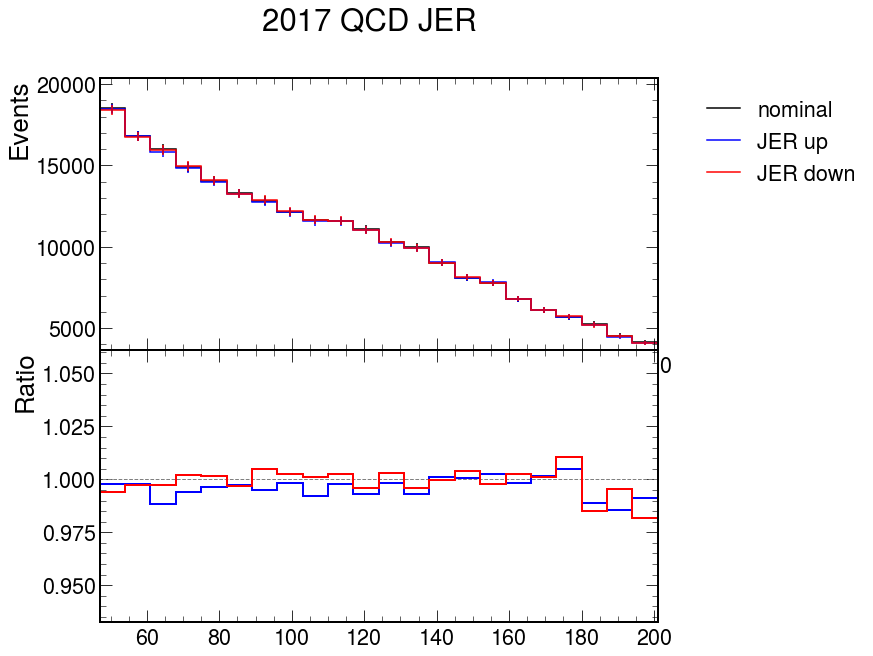

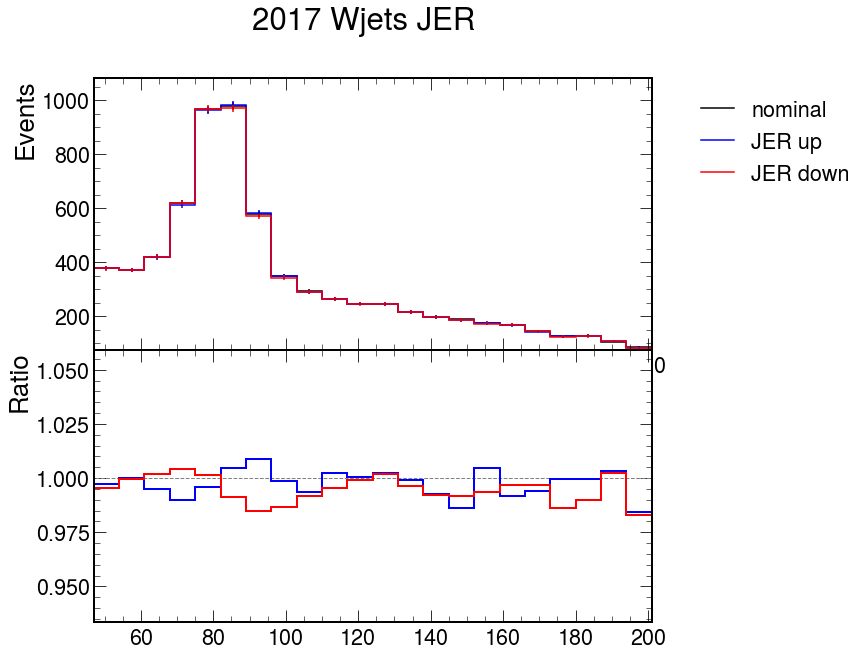

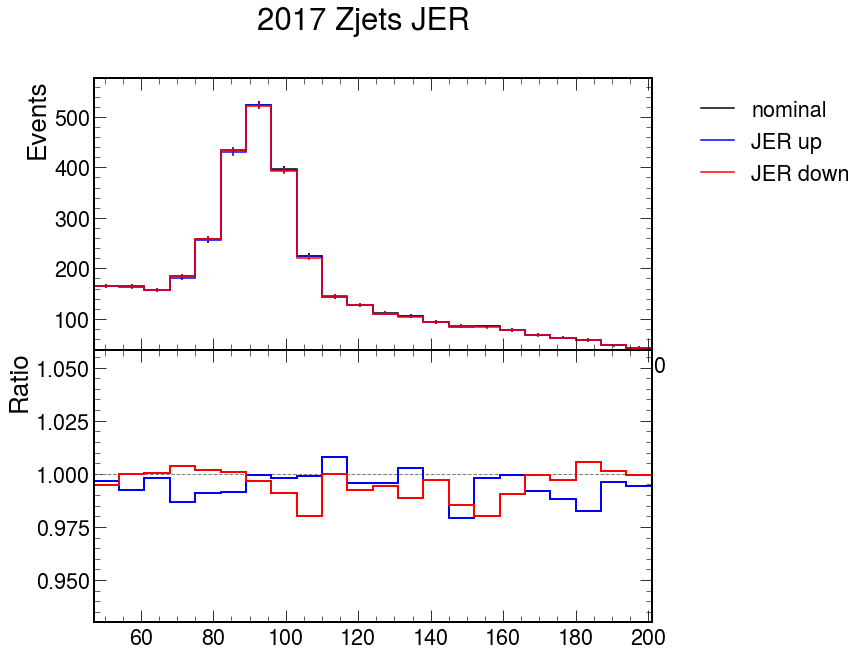

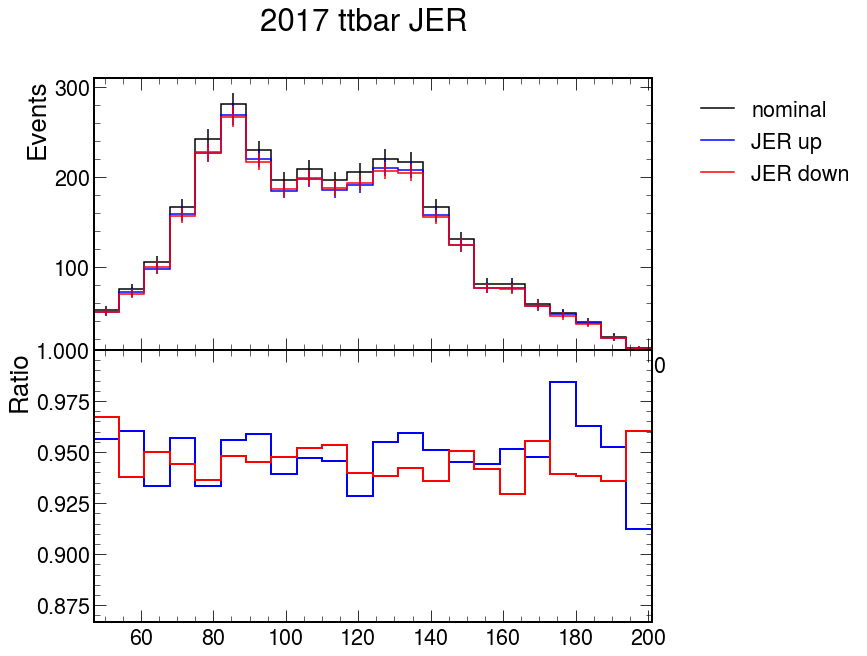

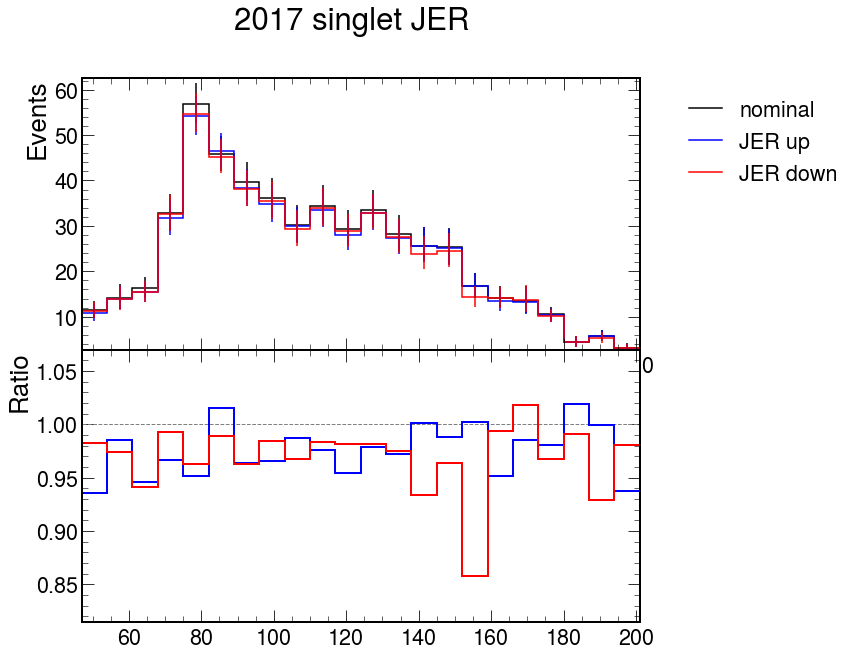

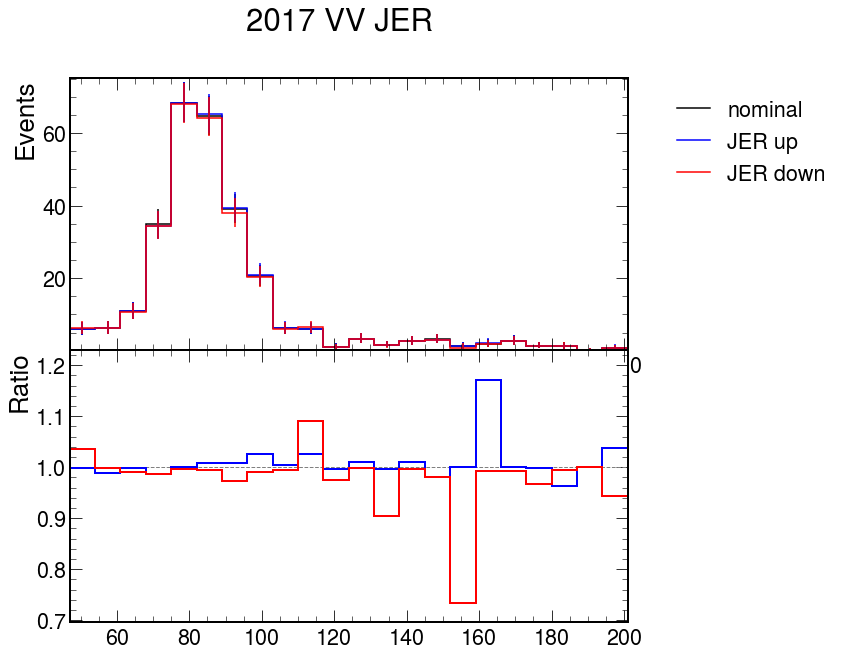

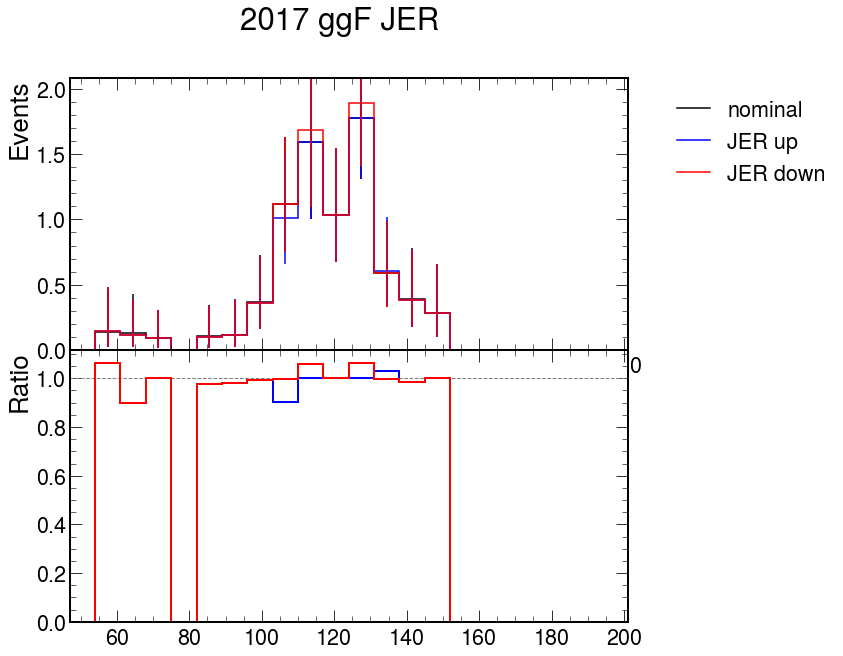

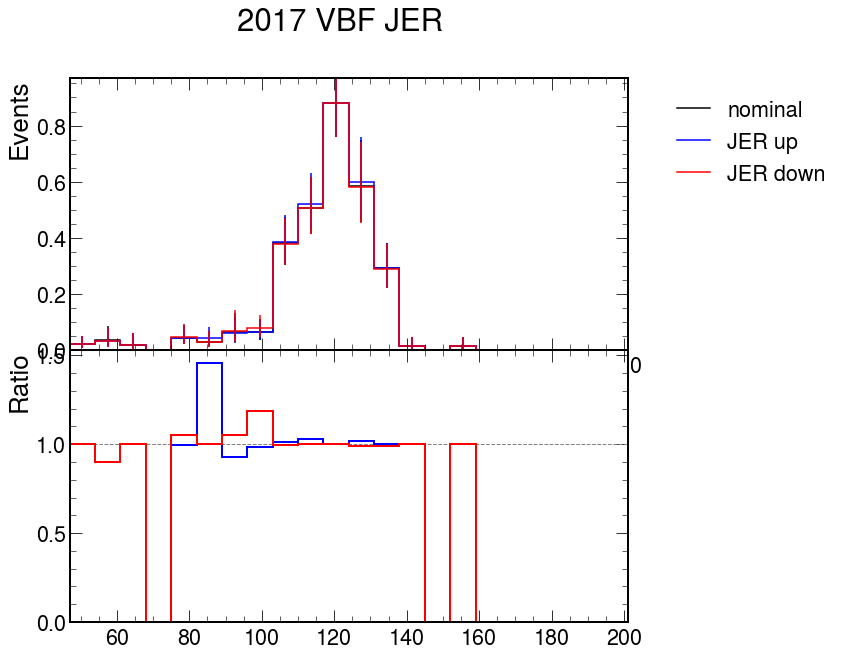

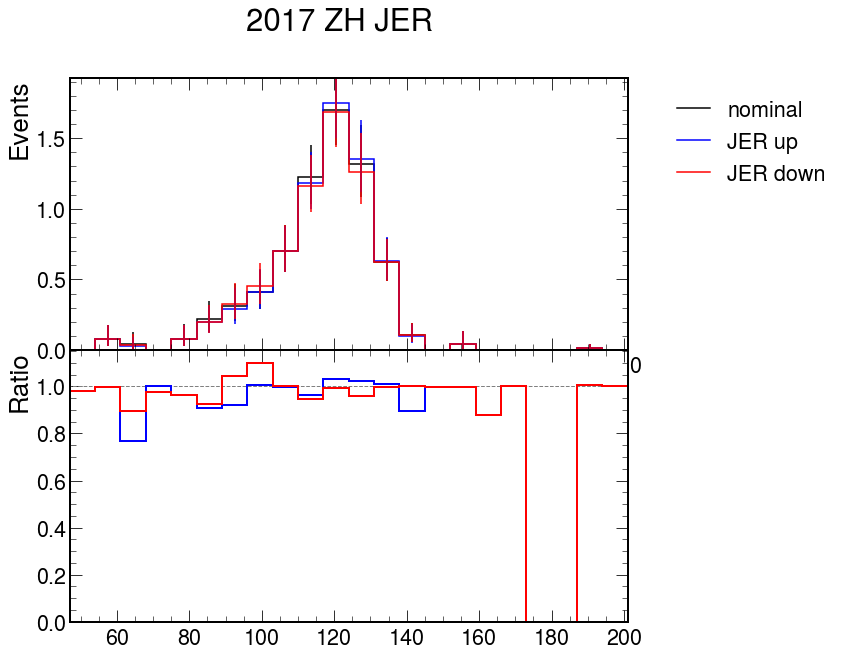

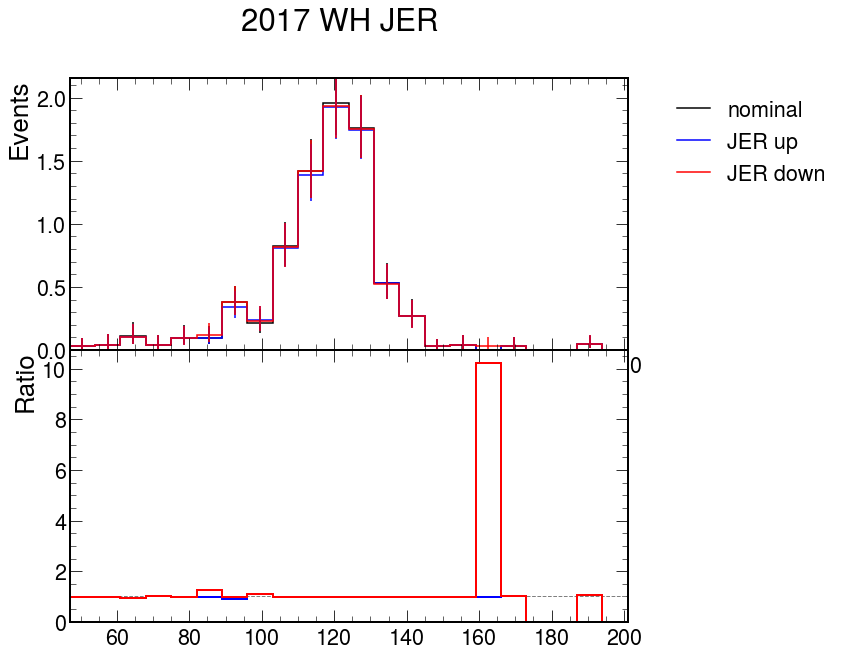

In [32]:
for p in mc:
    plot_syst(h.integrate('process',p),'JER',year+' '+p+' JER',year+'/syst_JER/'+p)

/srv/vh-charm-category/plotter.py:96: RuntimeWarning: invalid value encountered in double_scalars
  up_ratio = np.array([up_array[i]/nom_array[i] for i in range(len(nom_array))])
/srv/vh-charm-category/plotter.py:97: RuntimeWarning: invalid value encountered in double_scalars
  do_ratio = np.array([do_array[i]/nom_array[i] for i in range(len(nom_array))])
/srv/vh-charm-category/plotter.py:96: RuntimeWarning: invalid value encountered in double_scalars
  up_ratio = np.array([up_array[i]/nom_array[i] for i in range(len(nom_array))])
/srv/vh-charm-category/plotter.py:97: RuntimeWarning: invalid value encountered in double_scalars
  do_ratio = np.array([do_array[i]/nom_array[i] for i in range(len(nom_array))])
/srv/vh-charm-category/plotter.py:96: RuntimeWarning: invalid value encountered in double_scalars
  up_ratio = np.array([up_array[i]/nom_array[i] for i in range(len(nom_array))])
/srv/vh-charm-category/plotter.py:97: RuntimeWarning: invalid value encountered in double_scalars
  do_ra

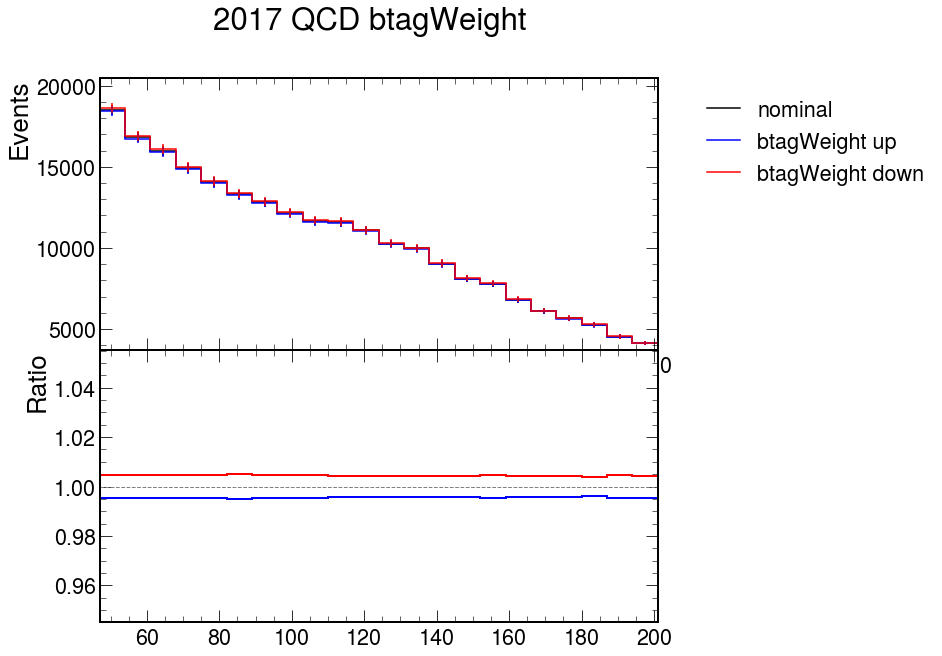

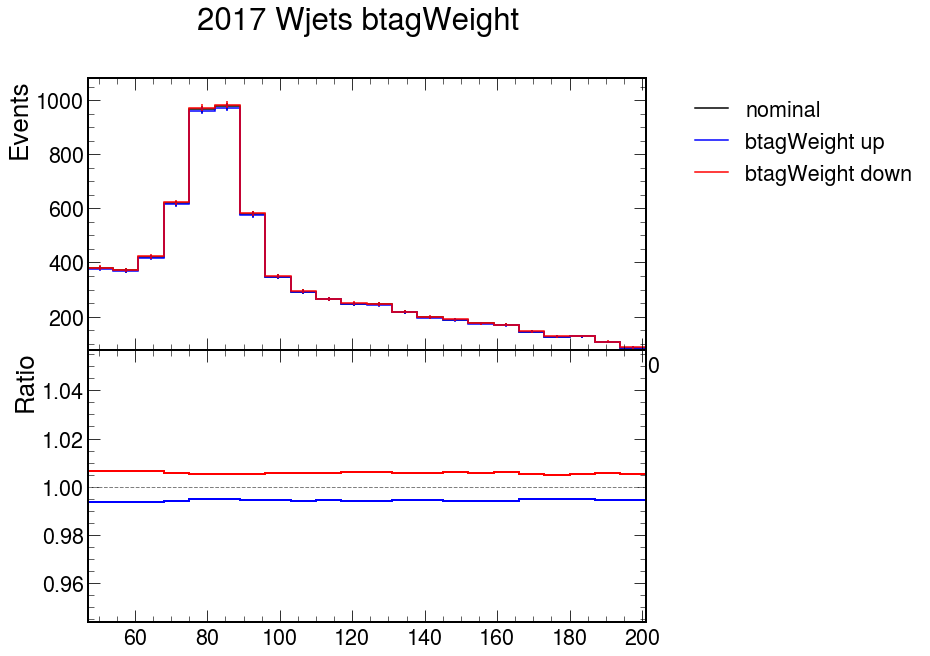

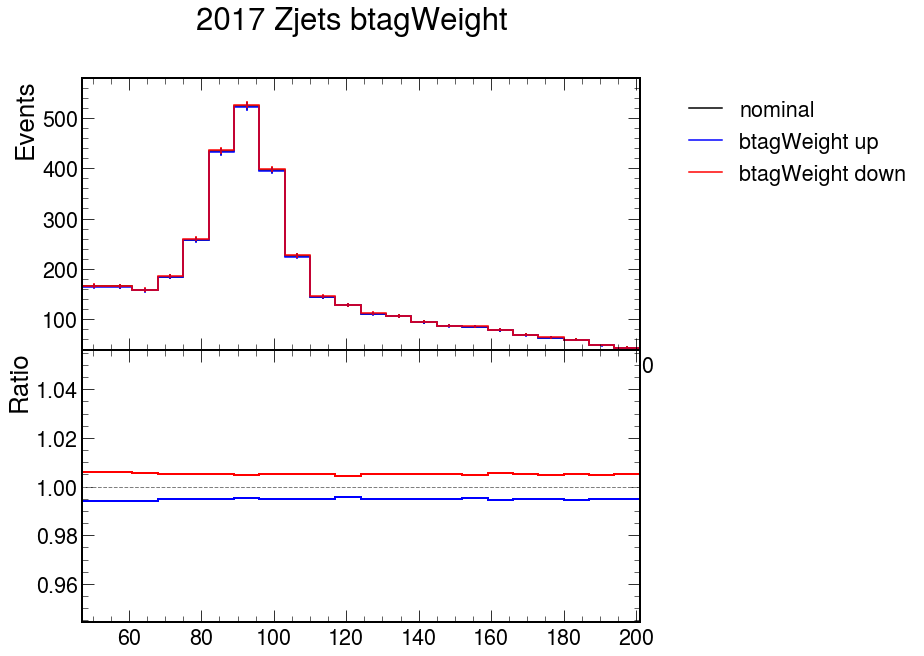

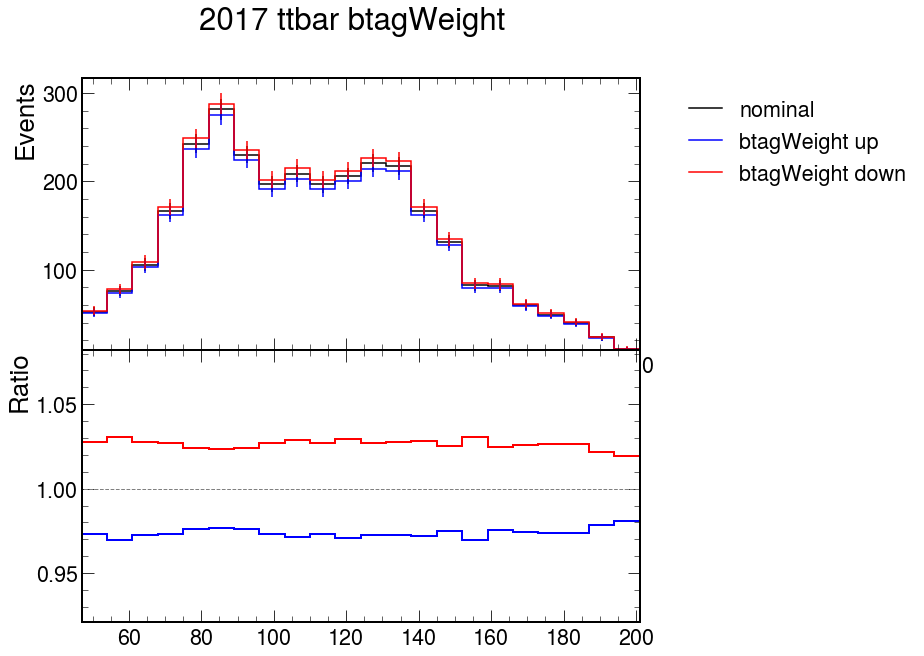

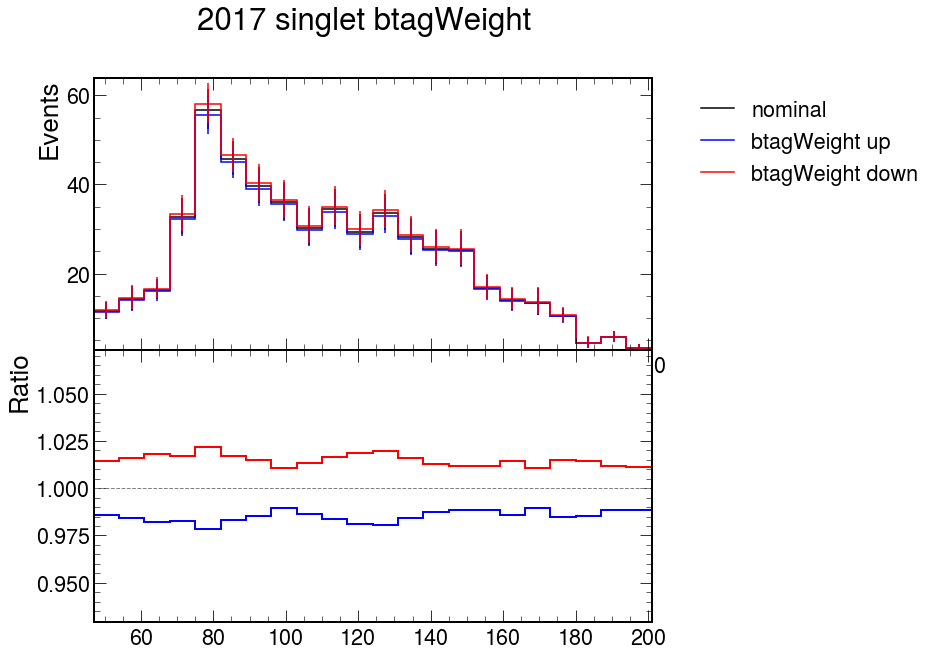

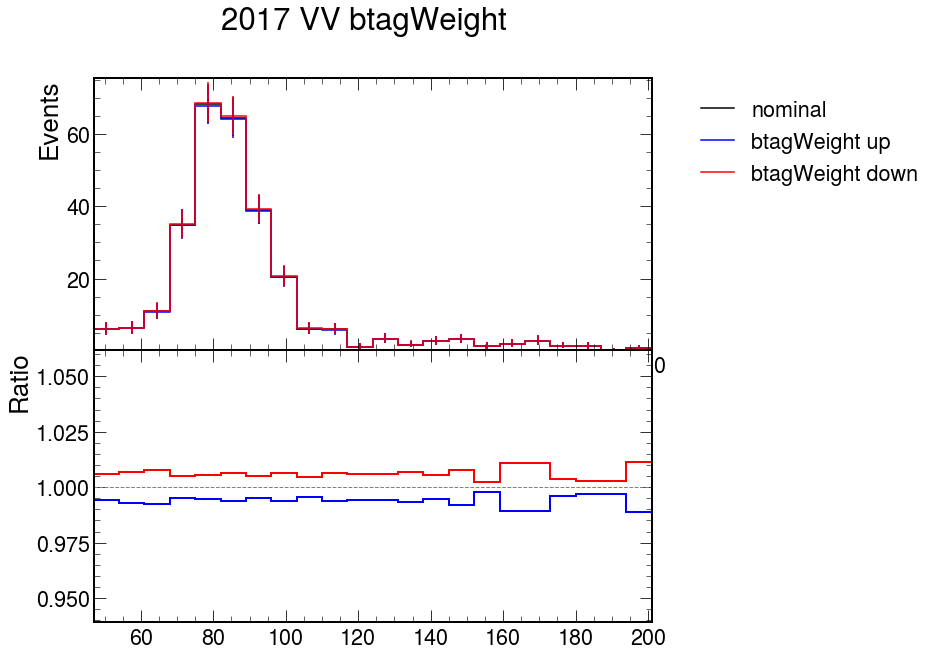

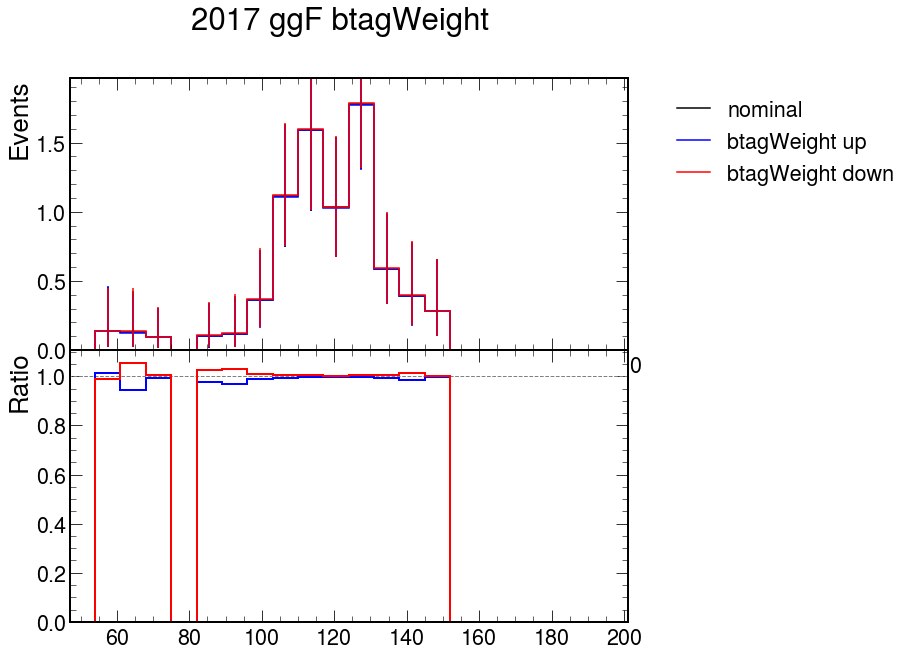

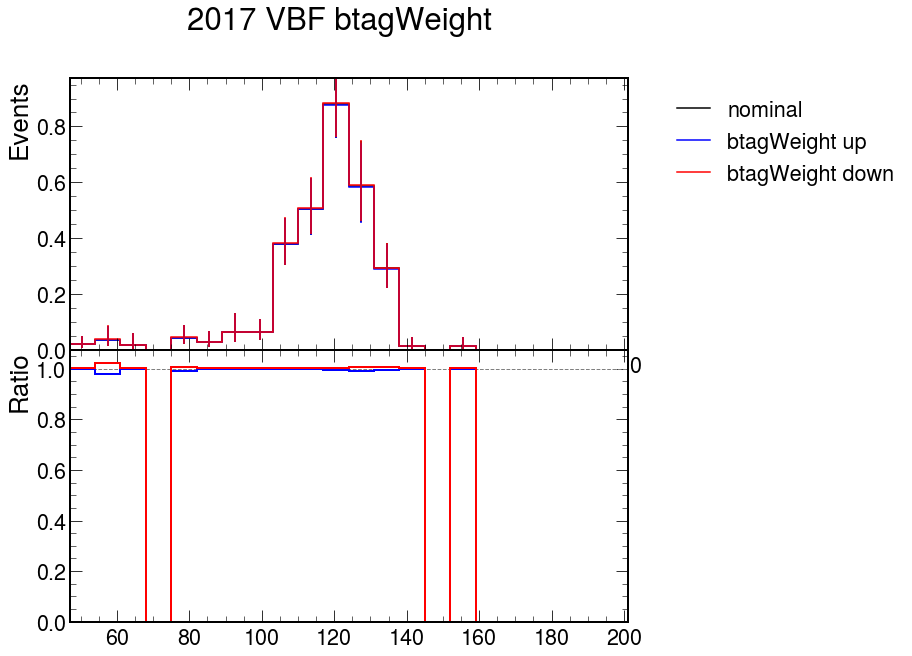

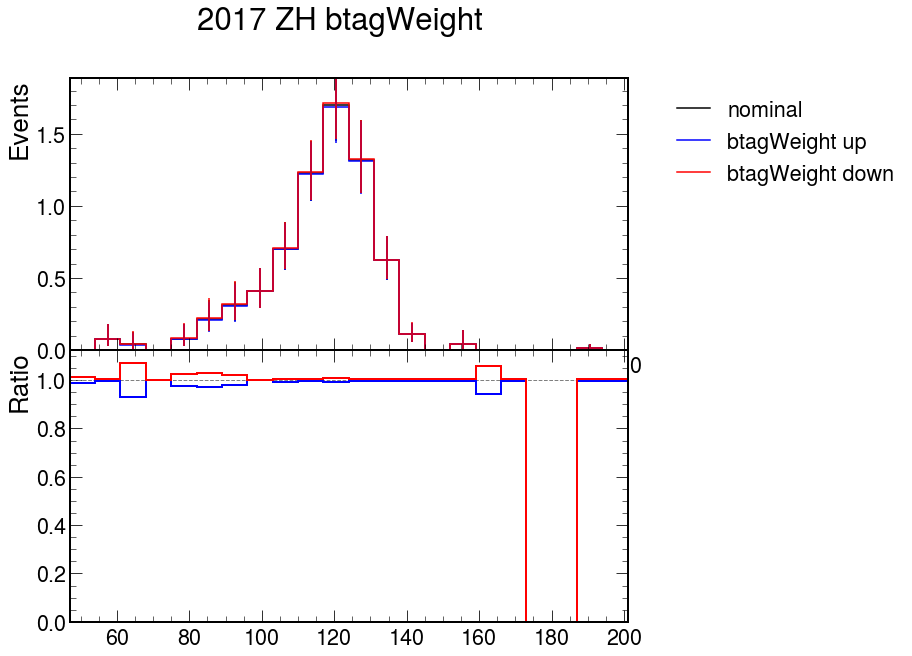

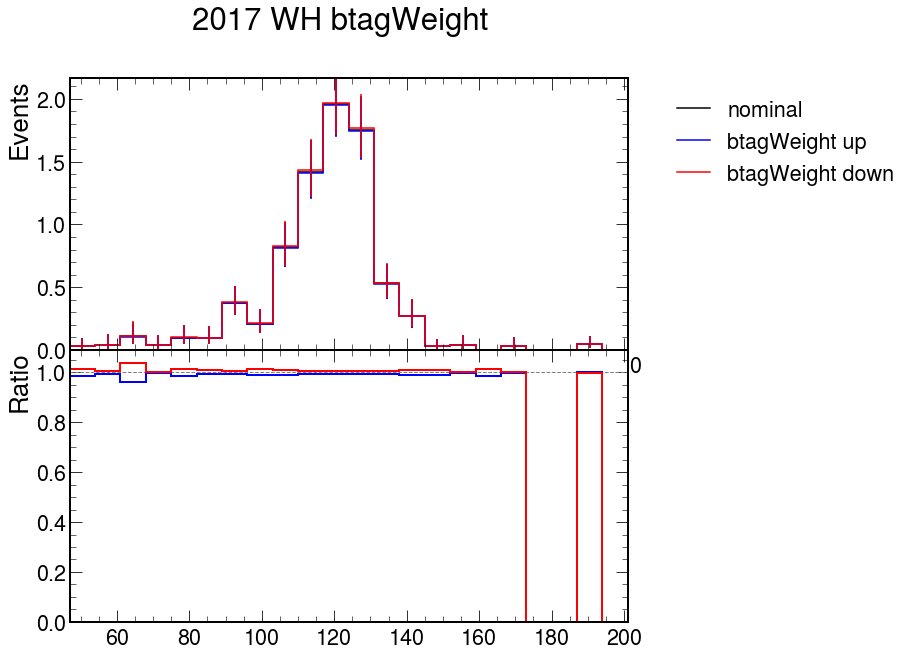

In [33]:
for p in mc:
    plot_syst(h.integrate('process',p),'btagWeight',year+' '+p+' btagWeight',year+'/syst_btagWeight/'+p)

/srv/vh-charm-category/plotter.py:96: RuntimeWarning: invalid value encountered in double_scalars
  up_ratio = np.array([up_array[i]/nom_array[i] for i in range(len(nom_array))])
/srv/vh-charm-category/plotter.py:97: RuntimeWarning: invalid value encountered in double_scalars
  do_ratio = np.array([do_array[i]/nom_array[i] for i in range(len(nom_array))])
/srv/vh-charm-category/plotter.py:96: RuntimeWarning: invalid value encountered in double_scalars
  up_ratio = np.array([up_array[i]/nom_array[i] for i in range(len(nom_array))])
/srv/vh-charm-category/plotter.py:97: RuntimeWarning: invalid value encountered in double_scalars
  do_ratio = np.array([do_array[i]/nom_array[i] for i in range(len(nom_array))])
/srv/vh-charm-category/plotter.py:96: RuntimeWarning: invalid value encountered in double_scalars
  up_ratio = np.array([up_array[i]/nom_array[i] for i in range(len(nom_array))])
/srv/vh-charm-category/plotter.py:97: RuntimeWarning: invalid value encountered in double_scalars
  do_ra

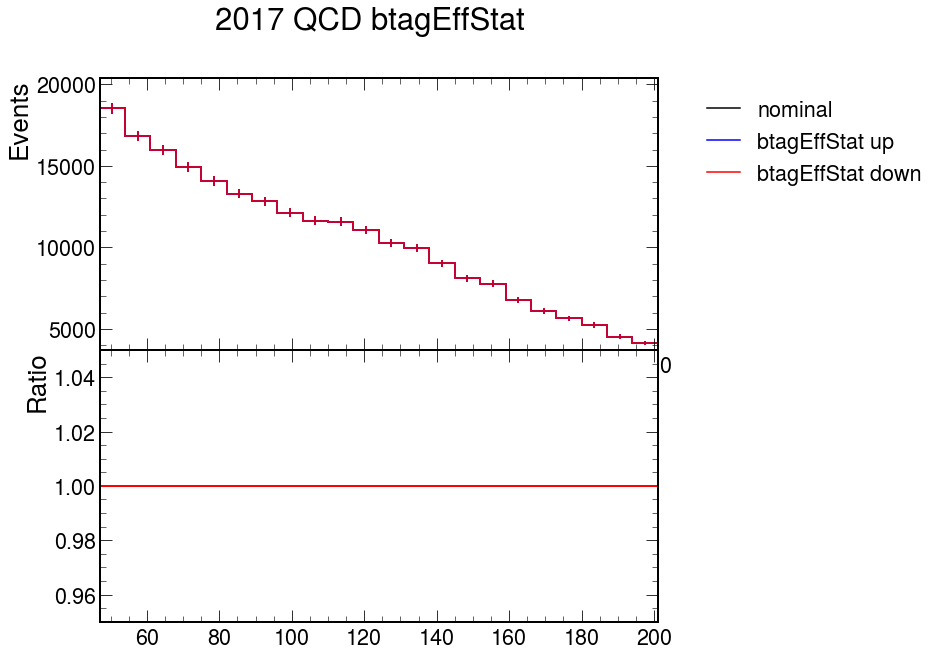

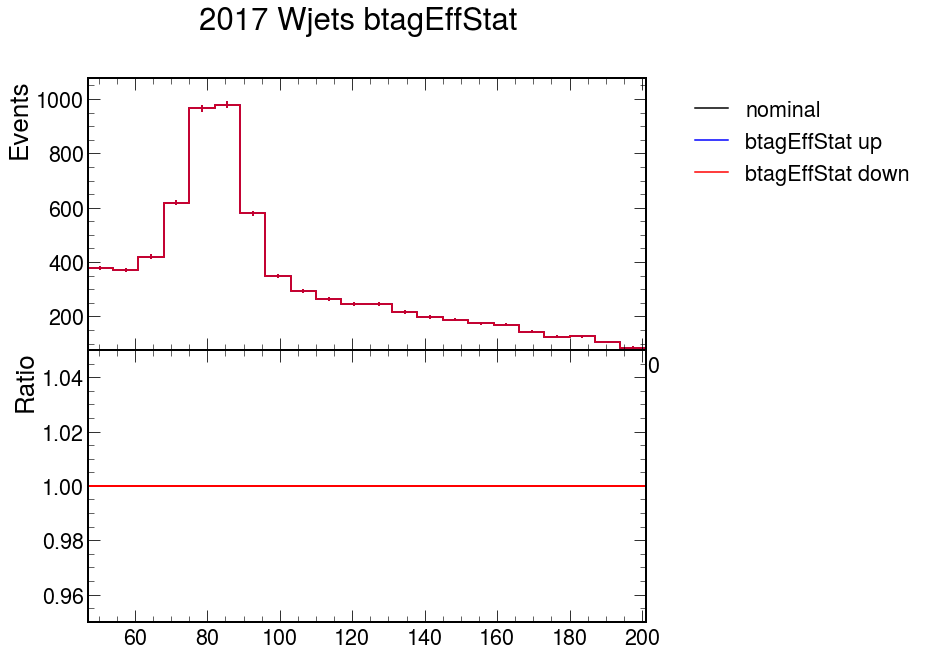

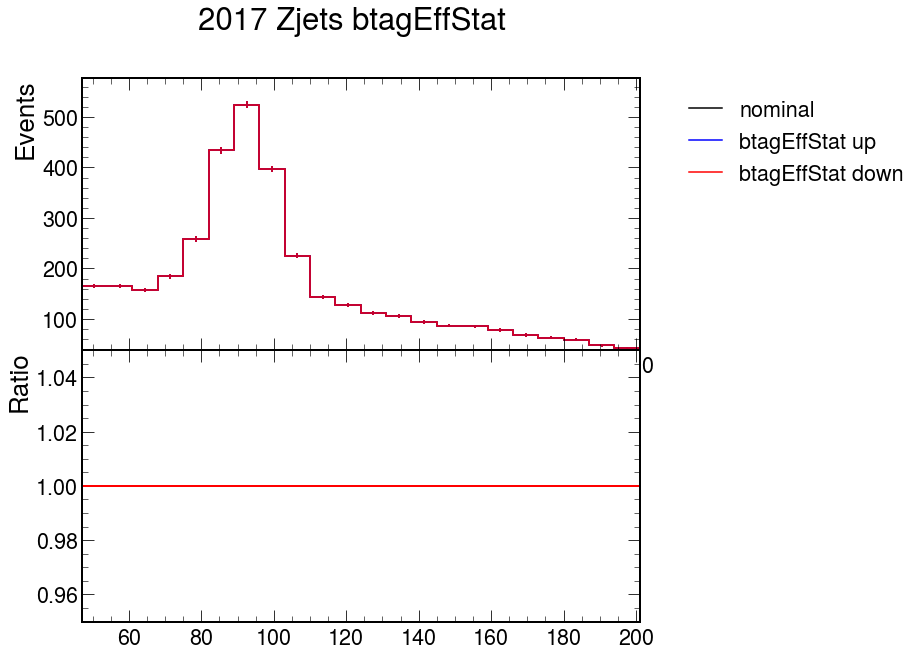

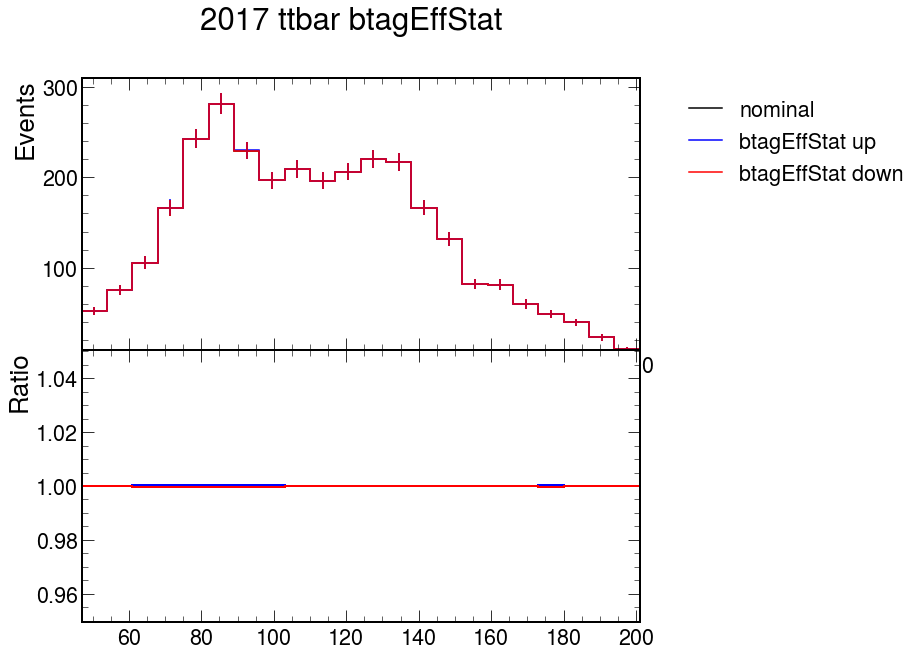

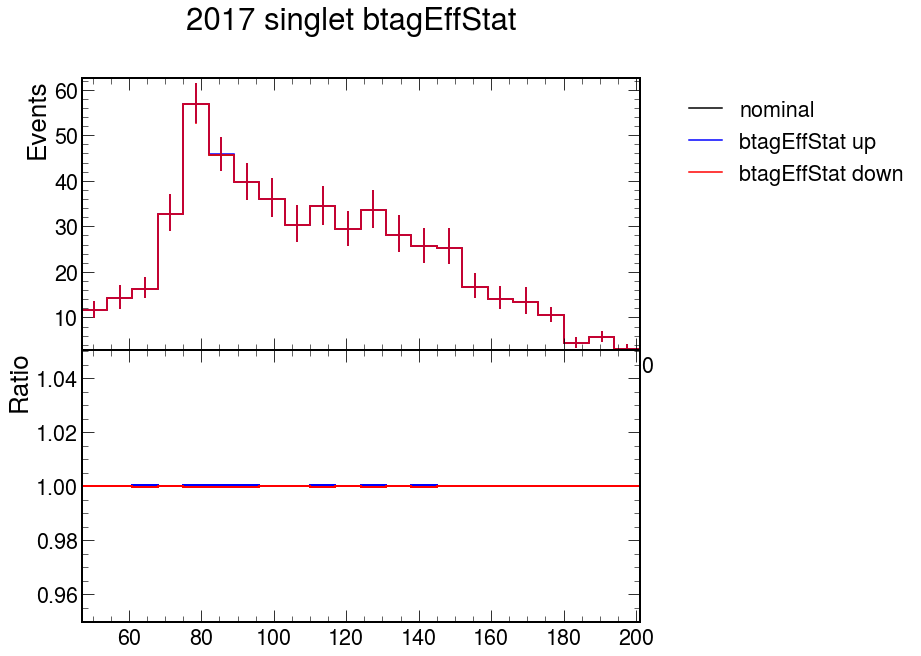

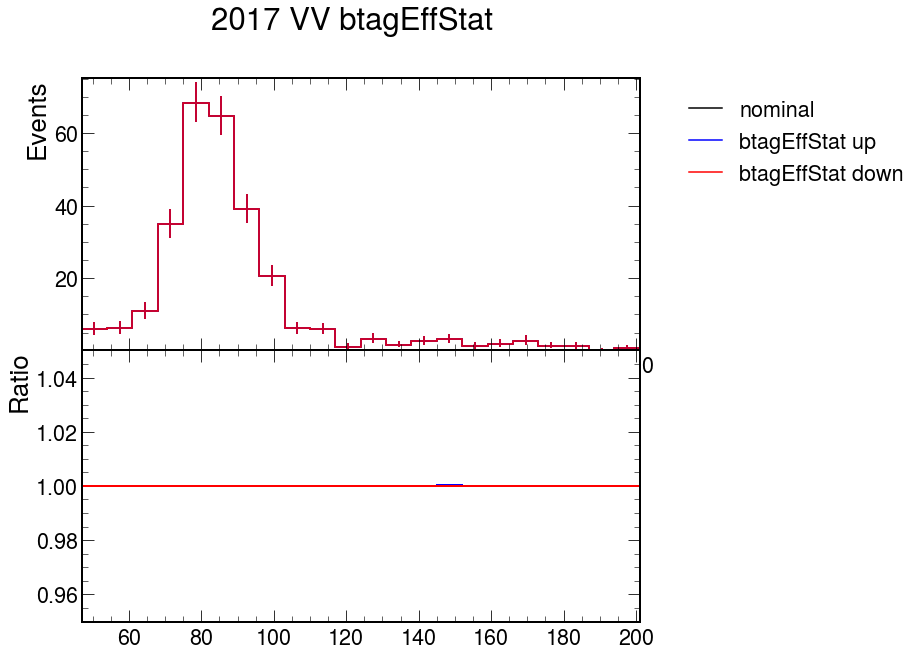

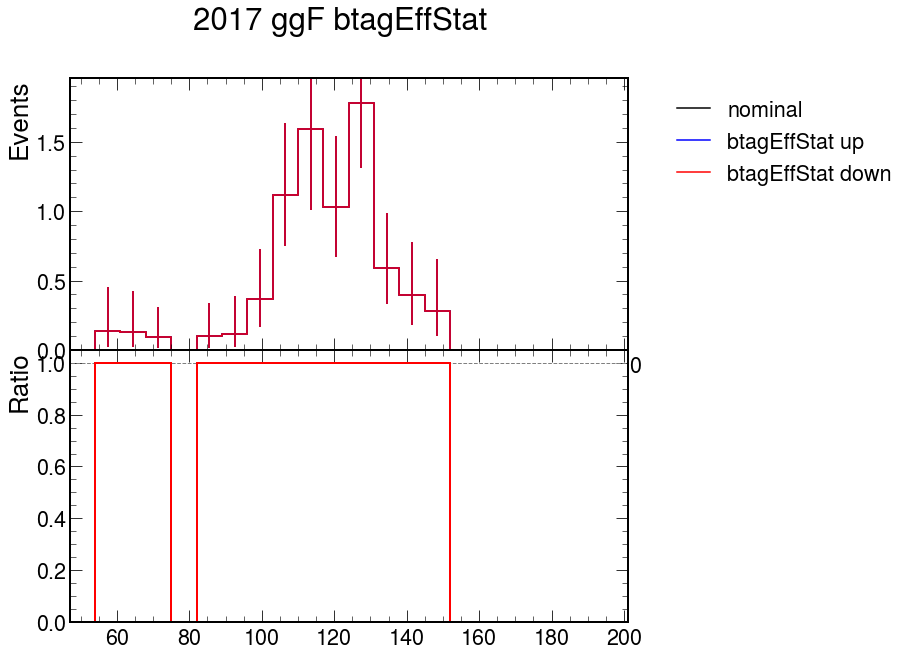

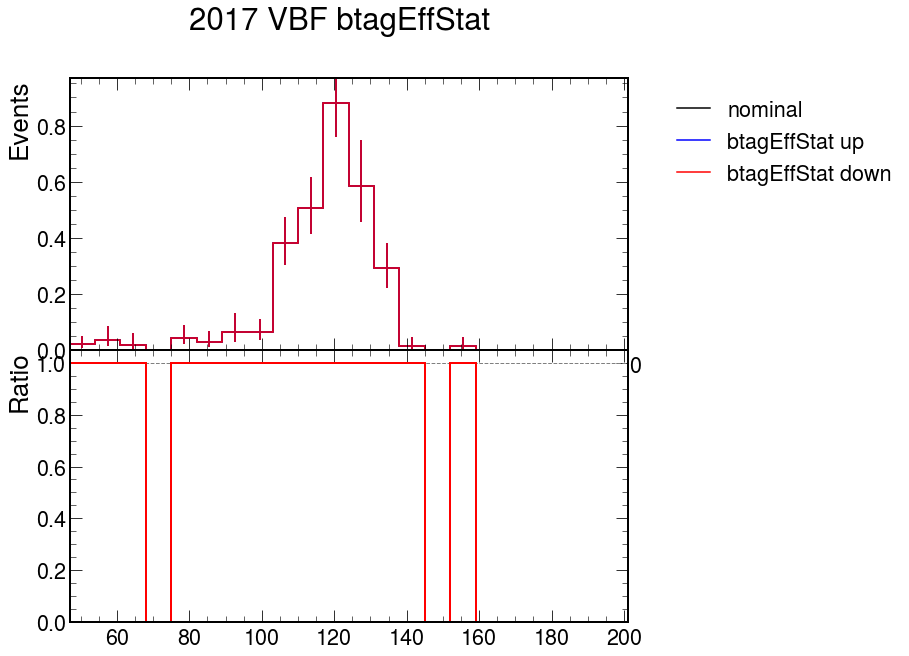

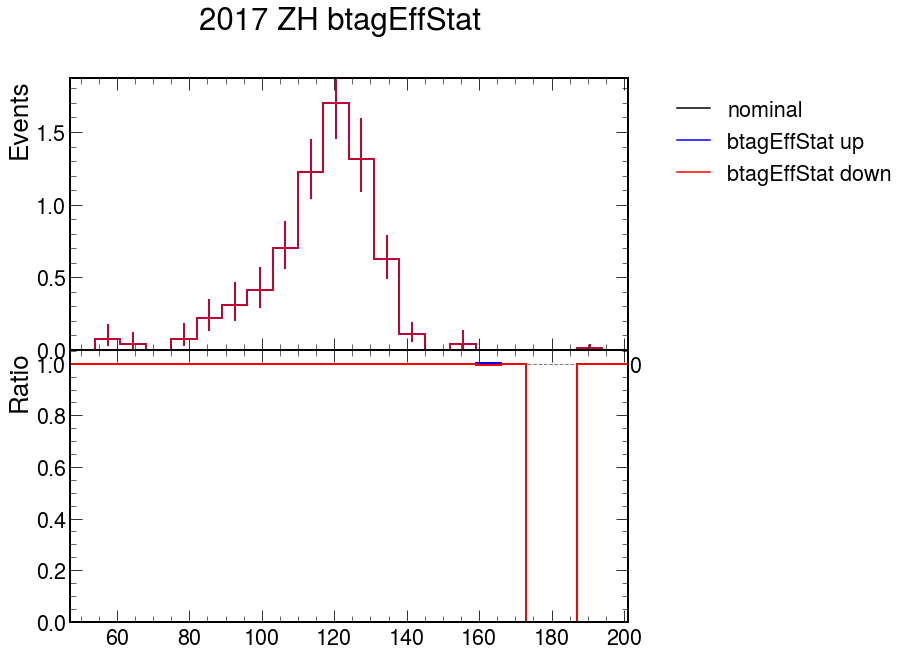

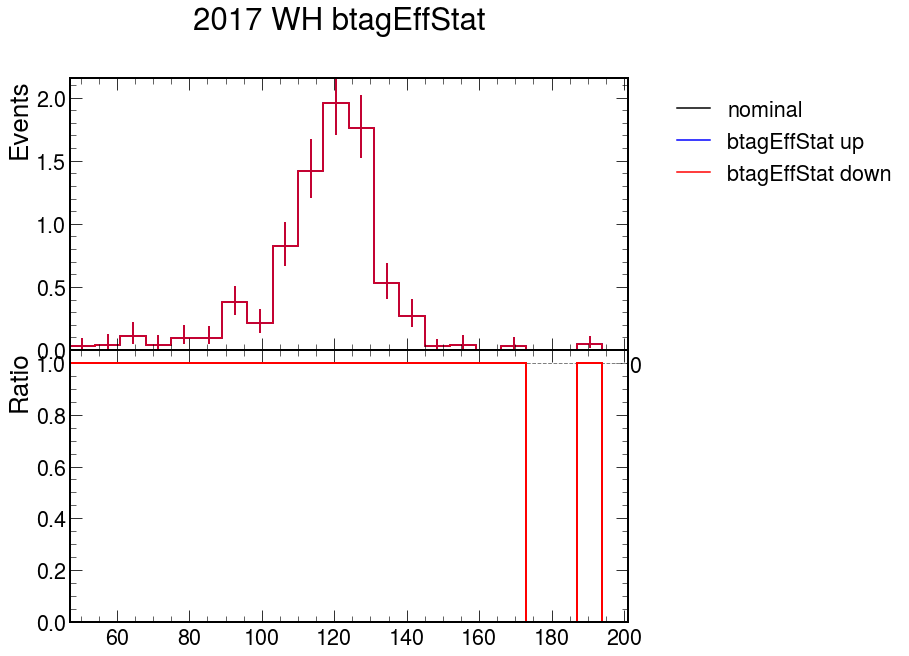

In [34]:
for p in mc:
    plot_syst(h.integrate('process',p),'btagEffStat',year+' '+p+' btagEffStat',year+'/syst_btagEffStat/'+p)

/srv/vh-charm-category/plotter.py:96: RuntimeWarning: invalid value encountered in double_scalars
  up_ratio = np.array([up_array[i]/nom_array[i] for i in range(len(nom_array))])
/srv/vh-charm-category/plotter.py:97: RuntimeWarning: invalid value encountered in double_scalars
  do_ratio = np.array([do_array[i]/nom_array[i] for i in range(len(nom_array))])
/srv/vh-charm-category/plotter.py:96: RuntimeWarning: invalid value encountered in double_scalars
  up_ratio = np.array([up_array[i]/nom_array[i] for i in range(len(nom_array))])
/srv/vh-charm-category/plotter.py:97: RuntimeWarning: invalid value encountered in double_scalars
  do_ratio = np.array([do_array[i]/nom_array[i] for i in range(len(nom_array))])
/srv/vh-charm-category/plotter.py:96: RuntimeWarning: invalid value encountered in double_scalars
  up_ratio = np.array([up_array[i]/nom_array[i] for i in range(len(nom_array))])
/srv/vh-charm-category/plotter.py:97: RuntimeWarning: invalid value encountered in double_scalars
  do_ra

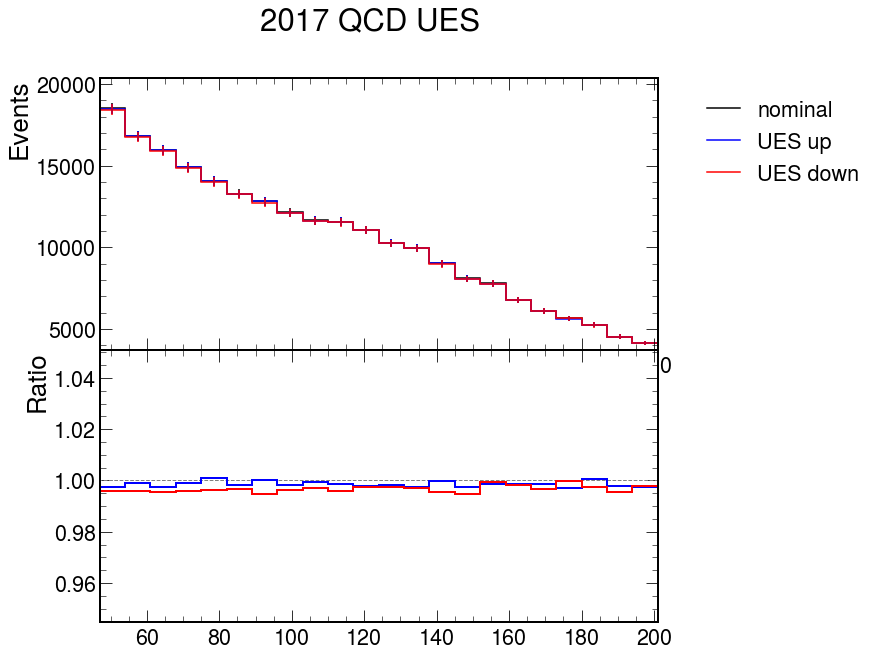

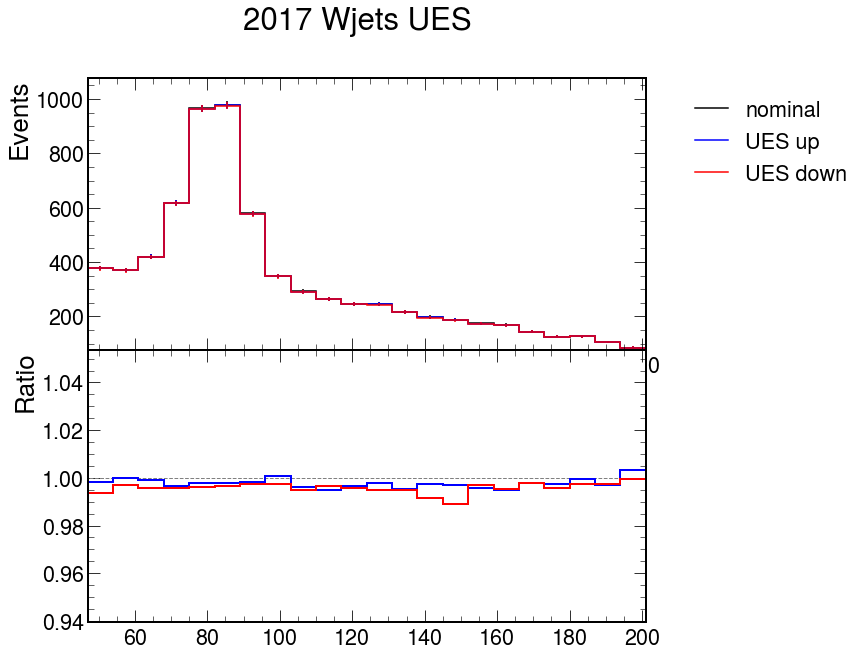

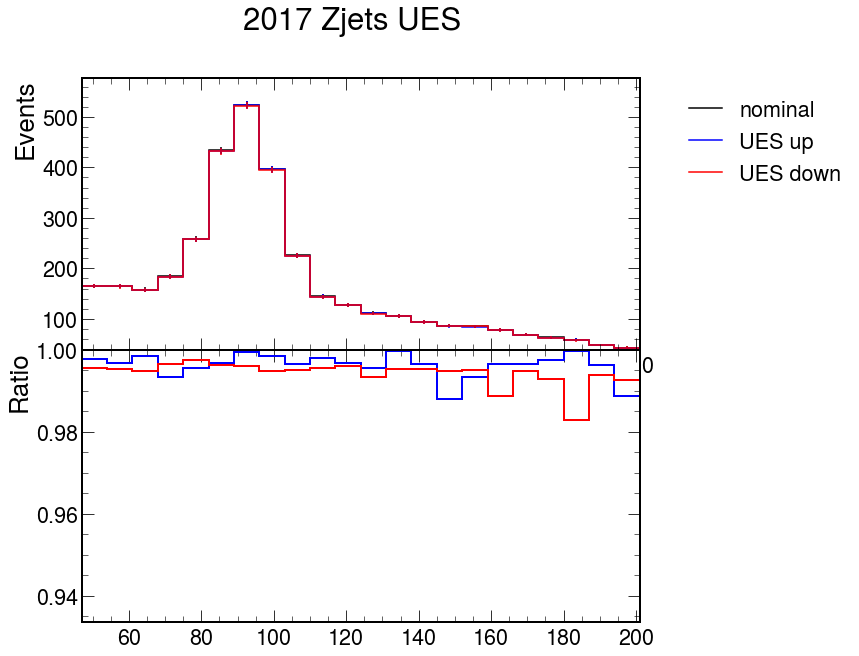

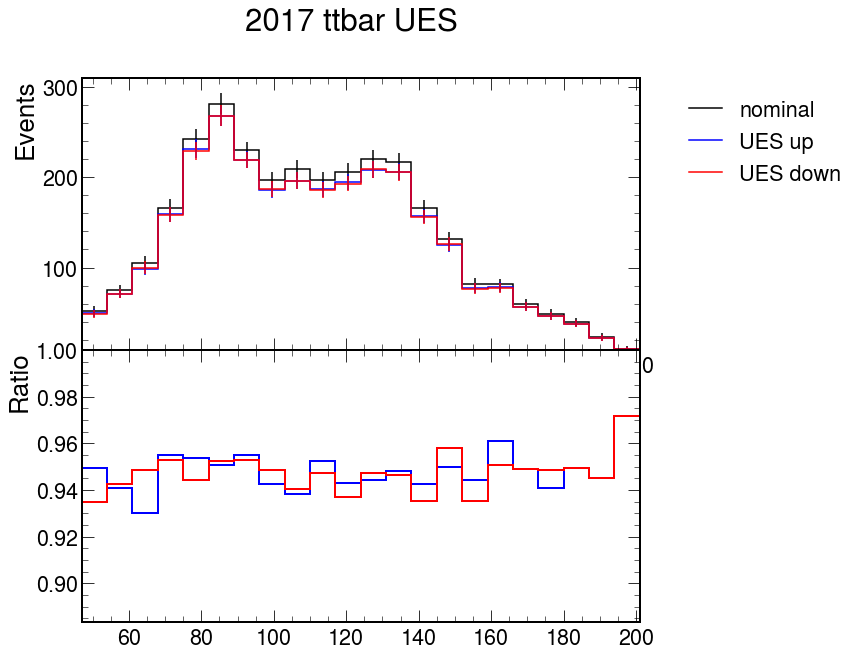

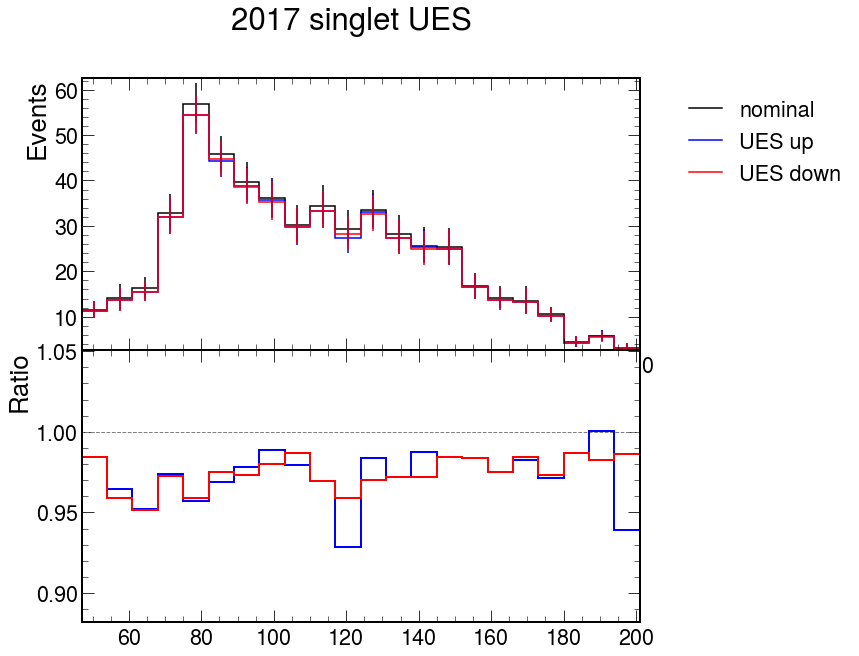

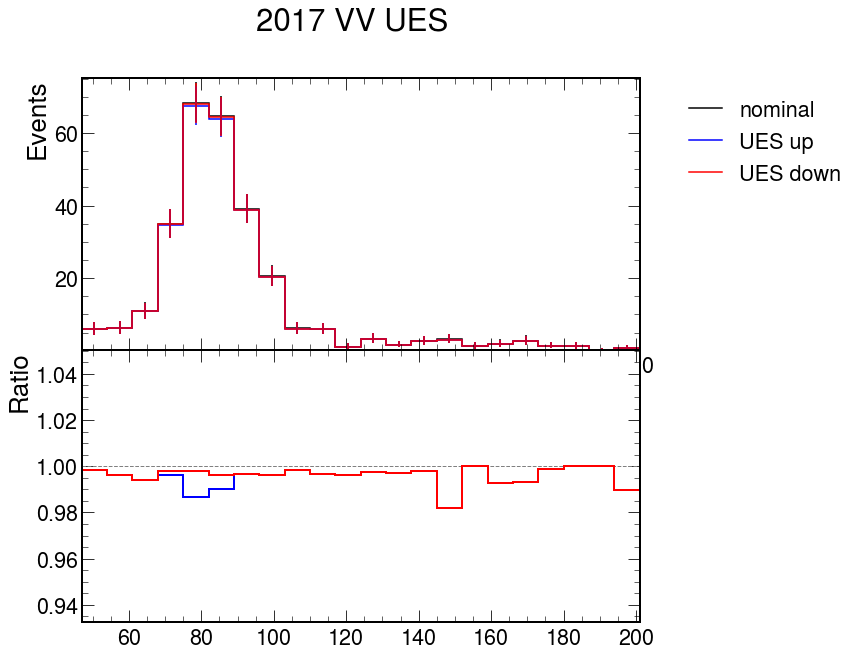

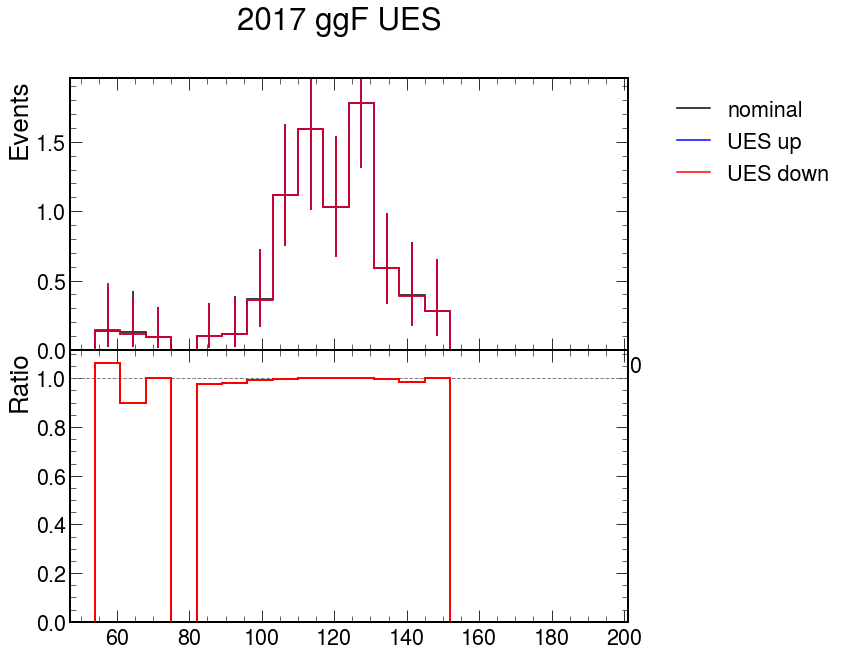

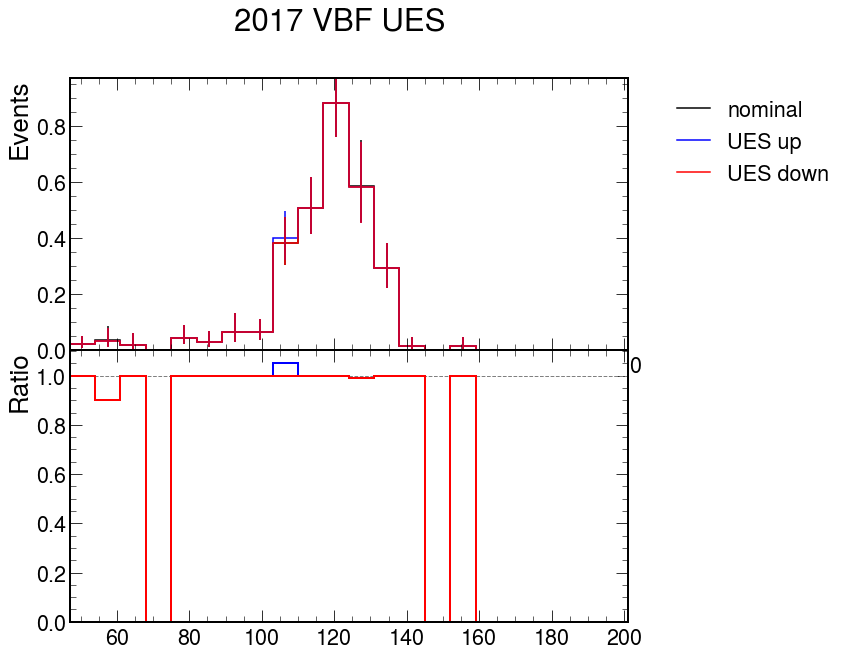

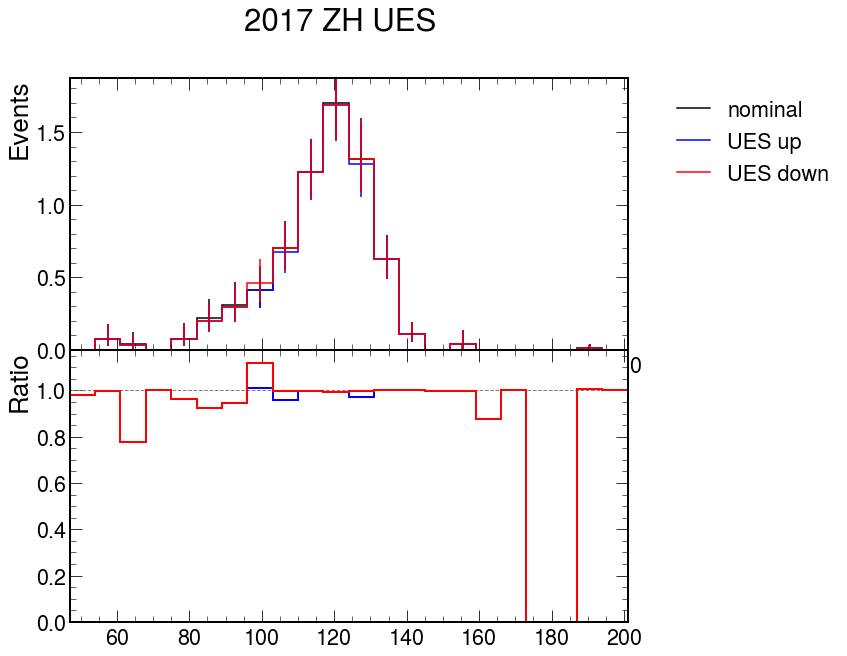

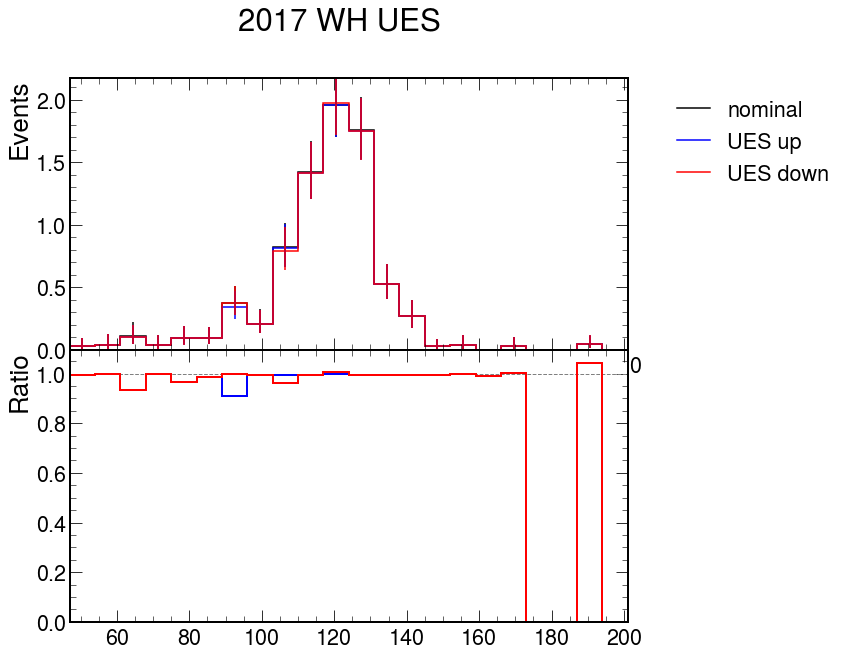

In [35]:
for p in mc:
    plot_syst(h.integrate('process',p),'UES',year+' '+p+' UES',year+'/syst_UES/'+p)

/srv/vh-charm-category/plotter.py:96: RuntimeWarning: invalid value encountered in double_scalars
  up_ratio = np.array([up_array[i]/nom_array[i] for i in range(len(nom_array))])
/srv/vh-charm-category/plotter.py:97: RuntimeWarning: invalid value encountered in double_scalars
  do_ratio = np.array([do_array[i]/nom_array[i] for i in range(len(nom_array))])
/srv/vh-charm-category/plotter.py:96: RuntimeWarning: invalid value encountered in double_scalars
  up_ratio = np.array([up_array[i]/nom_array[i] for i in range(len(nom_array))])
/srv/vh-charm-category/plotter.py:97: RuntimeWarning: invalid value encountered in double_scalars
  do_ratio = np.array([do_array[i]/nom_array[i] for i in range(len(nom_array))])
/srv/vh-charm-category/plotter.py:96: RuntimeWarning: invalid value encountered in double_scalars
  up_ratio = np.array([up_array[i]/nom_array[i] for i in range(len(nom_array))])
/srv/vh-charm-category/plotter.py:97: RuntimeWarning: invalid value encountered in double_scalars
  do_ra

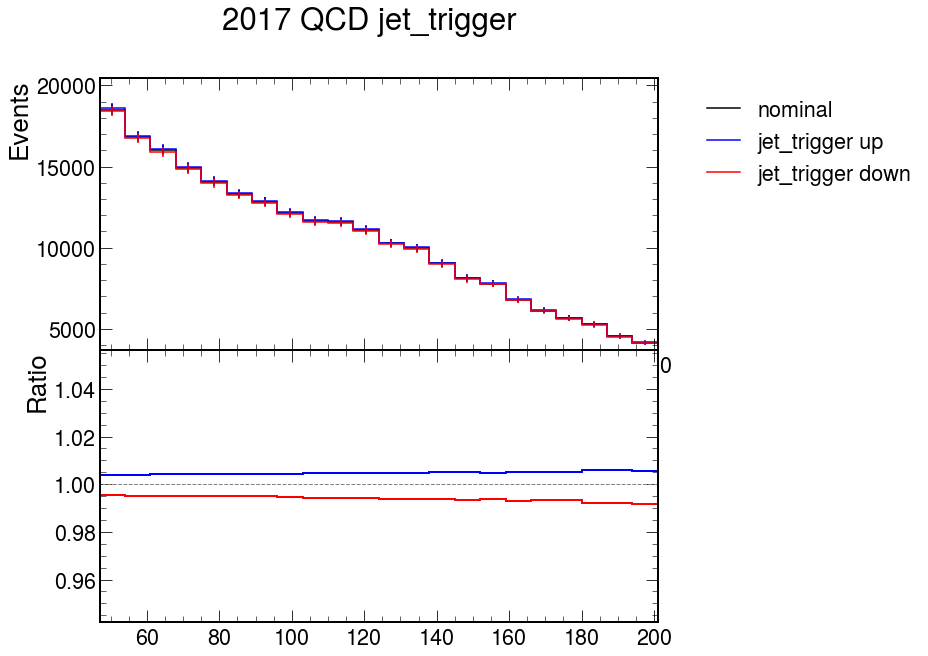

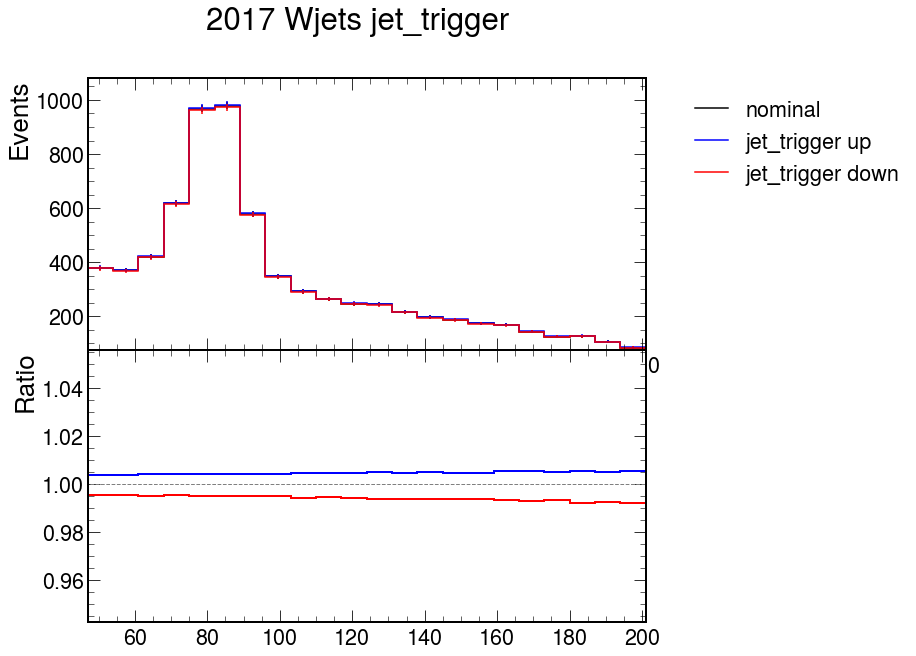

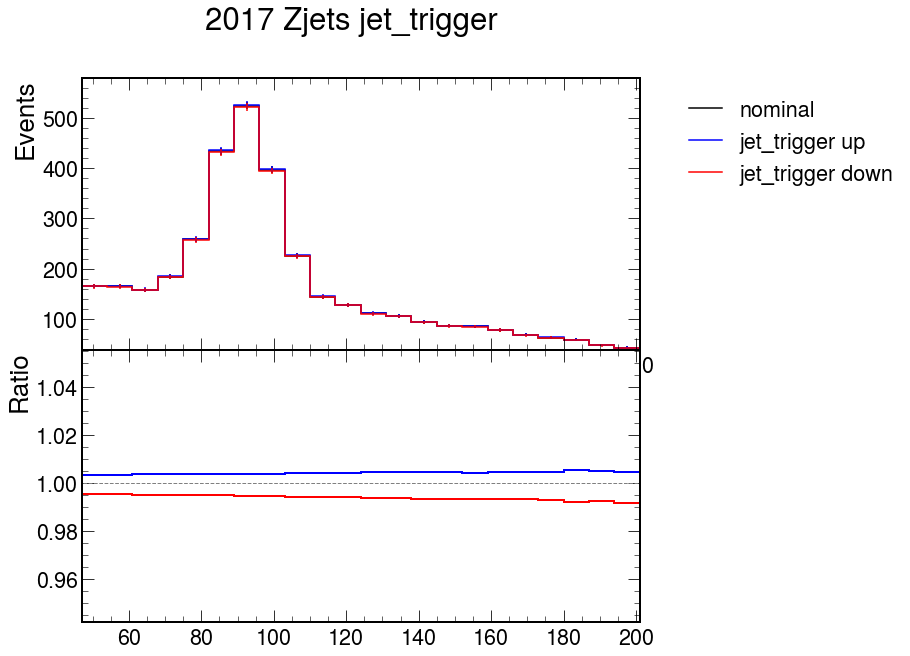

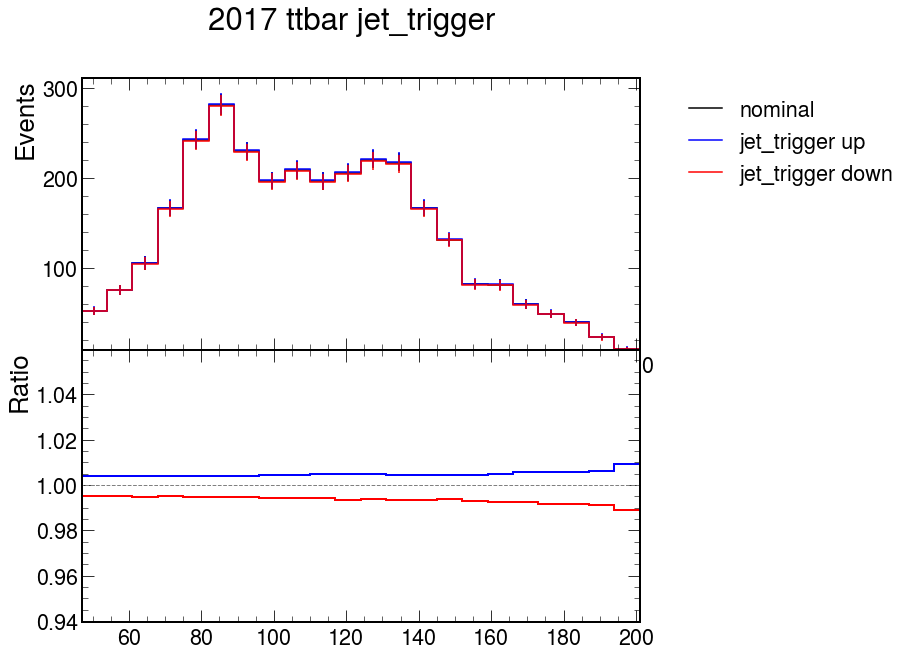

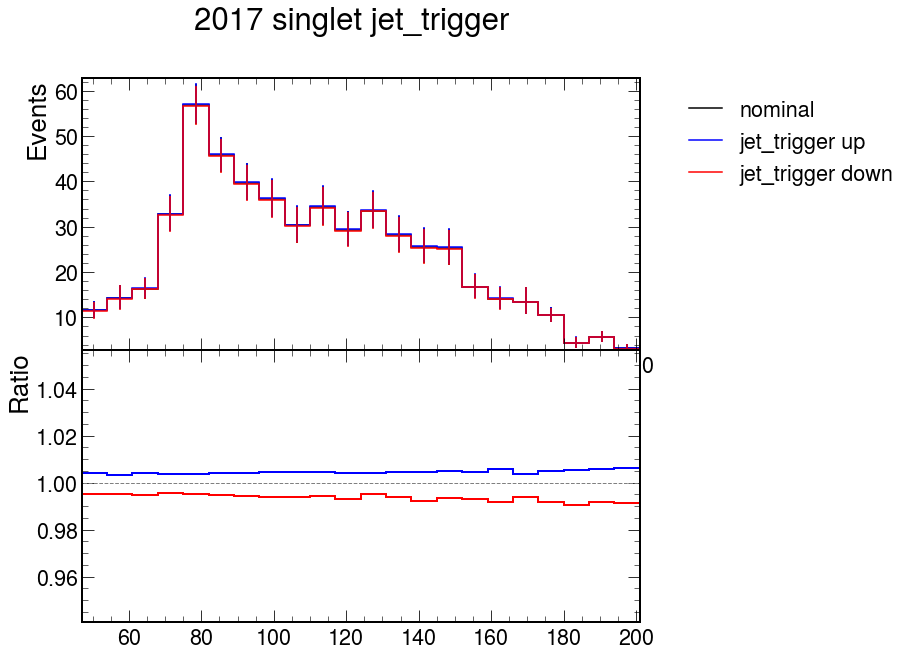

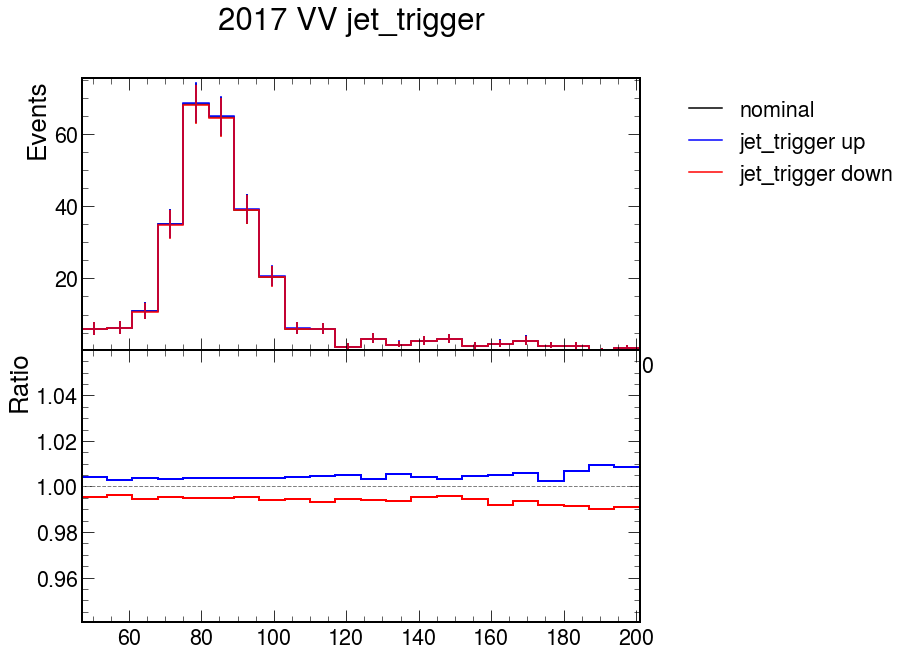

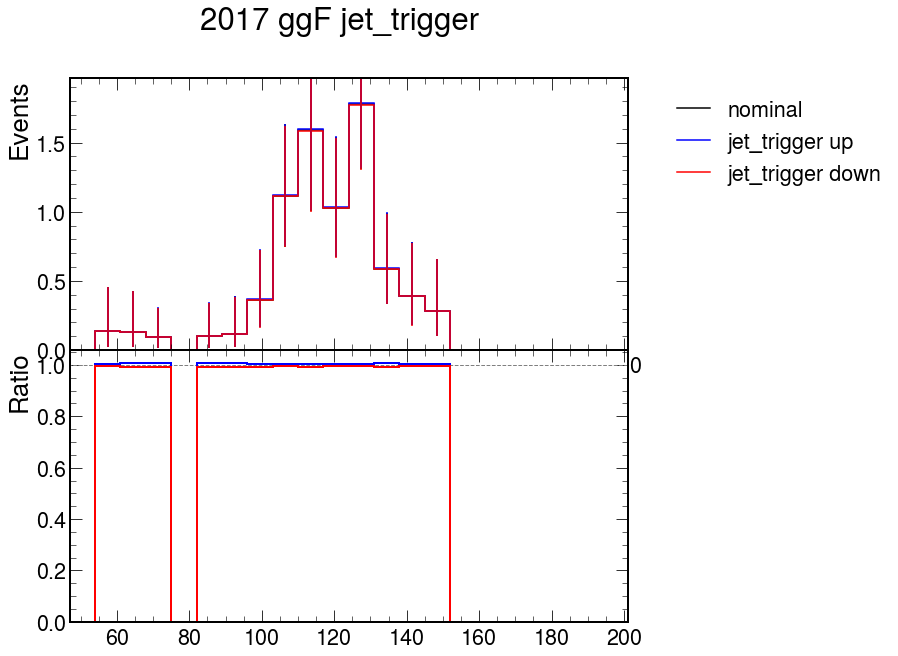

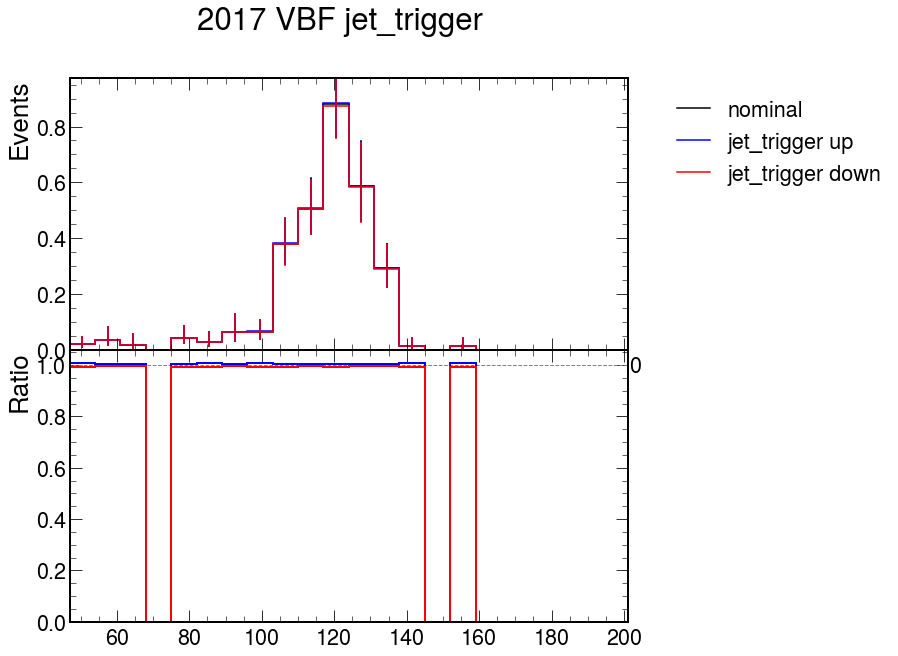

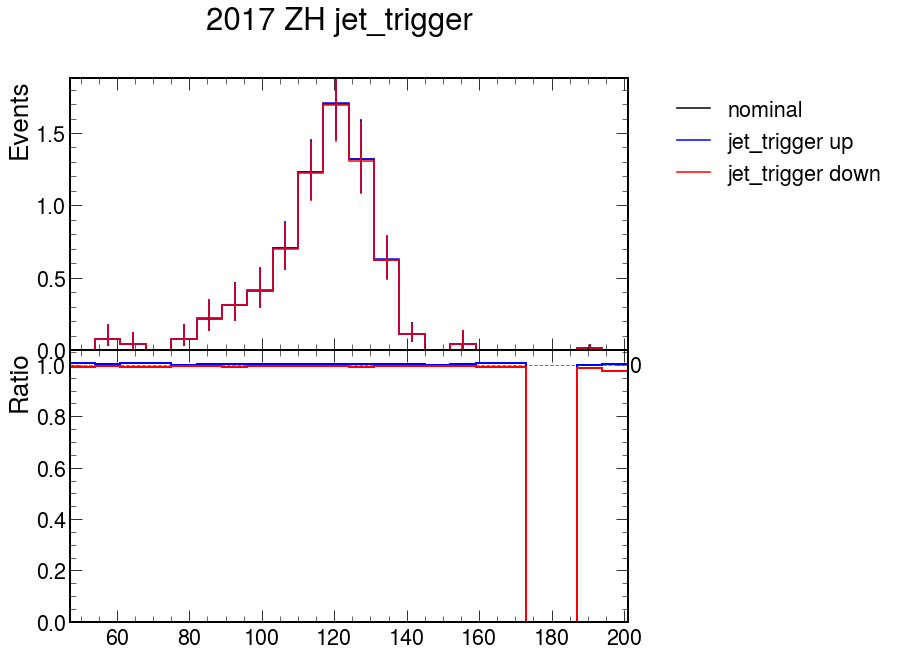

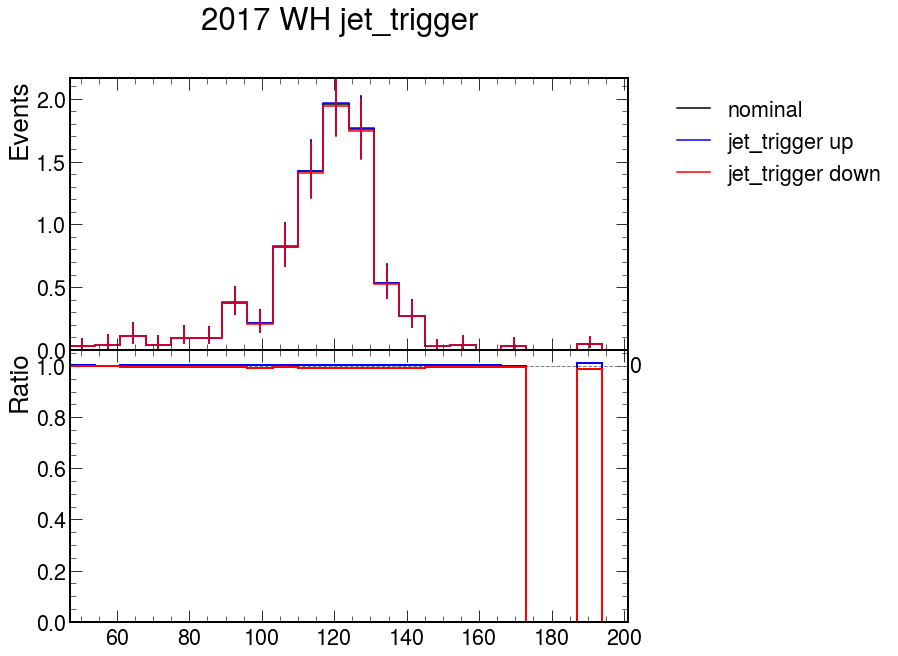

In [36]:
for p in mc:
    plot_syst(h.integrate('process',p),'jet_trigger',year+' '+p+' jet_trigger',year+'/syst_jet_trigger/'+p)